# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad, get_latest_game_week
from agent import Agent
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl


## Download latest data, train model and save model.

In [2]:
model_type = "linear"
features = ["total_points", "ict_index", "clean_sheets", "saves", "assists", "was_home","goals_scored"]
logger = pl.loggers.TensorBoardLogger(f"lightning_logs/model_comparison/{model_type}")
trainer = pl.Trainer(max_epochs=100, gpus=torch.cuda.device_count(), logger=logger,  callbacks=[EarlyStopping(monitor="val_loss")])
gameweek = get_latest_game_week()
agent = Agent(features, epochs=1, window=6, model_type=model_type, gameweek=gameweek)
await agent.get_data()
await agent.update_model(trainer)

GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 43    
--------------------------------------
43        Trainable params
0         Non-trainable params
43        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|██████████████████████████████                              | 1/2 [00:00<00:00,  2.24it/s]

/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                       | 0/19 [00:00<00:00, 27235.74it/s]

Epoch 0:   0%|                                                                         | 0/19 [00:00<00:00, 1714.76it/s]

Epoch 0:   5%|███▉                                                                       | 1/19 [00:00<00:02,  6.49it/s]

Epoch 0:   5%|██▊                                                   | 1/19 [00:00<00:02,  6.42it/s, loss=2.55, v_num=65]

Epoch 0:  11%|█████▋                                                | 2/19 [00:00<00:01,  9.45it/s, loss=2.44, v_num=65]

Epoch 0:  16%|████████▌                                             | 3/19 [00:00<00:01, 12.35it/s, loss=2.45, v_num=65]

Epoch 0:  21%|███████████▎                                          | 4/19 [00:00<00:00, 15.09it/s, loss=2.46, v_num=65]

Epoch 0:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 17.59it/s, loss=2.46, v_num=65]

Epoch 0:  32%|█████████████████                                     | 6/19 [00:00<00:00, 20.19it/s, loss=2.45, v_num=65]

Epoch 0:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 22.72it/s, loss=2.43, v_num=65]

Epoch 0:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 25.19it/s, loss=2.42, v_num=65]

Epoch 0:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 27.33it/s, loss=2.42, v_num=65]

Epoch 0:  53%|████████████████████████████▍                         | 10/19 [00:00<00:00, 29.29it/s, loss=2.4, v_num=65]

Epoch 0:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 31.39it/s, loss=2.38, v_num=65]

Epoch 0:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 33.55it/s, loss=2.38, v_num=65]

Epoch 0:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 35.43it/s, loss=2.36, v_num=65]

Epoch 0:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 37.52it/s, loss=2.35, v_num=65]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 35.11it/s, loss=2.35, v_num=65]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 35.04it/s, loss=2.31, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.96it/s]

Epoch 0: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.09it/s, loss=2.31, v_num=65]

Epoch 0:   0%|                                                   | 0/19 [00:00<00:00, 27962.03it/s, loss=2.31, v_num=65]

Epoch 1:   0%|                                                    | 0/19 [00:00<00:00, 1335.34it/s, loss=2.31, v_num=65]

Epoch 1:   5%|██▉                                                    | 1/19 [00:00<00:03,  5.06it/s, loss=2.3, v_num=65]

Epoch 1:  11%|█████▋                                                | 2/19 [00:00<00:02,  7.10it/s, loss=2.27, v_num=65]

Epoch 1:  16%|████████▌                                             | 3/19 [00:00<00:01,  9.28it/s, loss=2.25, v_num=65]

Epoch 1:  21%|███████████▎                                          | 4/19 [00:00<00:01, 11.31it/s, loss=2.24, v_num=65]

Epoch 1:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 13.14it/s, loss=2.23, v_num=65]

Epoch 1:  32%|█████████████████▎                                     | 6/19 [00:00<00:00, 15.10it/s, loss=2.2, v_num=65]

Epoch 1:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 17.00it/s, loss=2.18, v_num=65]

Epoch 1:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 18.62it/s, loss=2.15, v_num=65]

Epoch 1:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 20.05it/s, loss=2.12, v_num=65]

Epoch 1:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 21.71it/s, loss=2.09, v_num=65]

Epoch 1:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 23.34it/s, loss=2.06, v_num=65]

Epoch 1:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 24.78it/s, loss=2.04, v_num=65]

Epoch 1:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 26.12it/s, loss=2.01, v_num=65]

Epoch 1:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 27.63it/s, loss=2.01, v_num=65]

Epoch 1:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 27.56it/s, loss=1.98, v_num=65]

Epoch 1:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 26.27it/s, loss=1.94, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.99it/s]

Epoch 1: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 16.88it/s, loss=1.94, v_num=65]

Epoch 1:   0%|                                                   | 0/19 [00:00<00:00, 24818.37it/s, loss=1.94, v_num=65]

Epoch 2:   0%|                                                     | 0/19 [00:00<00:00, 983.19it/s, loss=1.94, v_num=65]

Epoch 2:   5%|██▊                                                   | 1/19 [00:00<00:03,  5.85it/s, loss=1.91, v_num=65]

Epoch 2:  11%|█████▋                                                | 2/19 [00:00<00:02,  8.18it/s, loss=1.87, v_num=65]

Epoch 2:  16%|████████▌                                             | 3/19 [00:00<00:01, 10.24it/s, loss=1.85, v_num=65]

Epoch 2:  21%|███████████▎                                          | 4/19 [00:00<00:01, 12.52it/s, loss=1.82, v_num=65]

Epoch 2:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 14.74it/s, loss=1.81, v_num=65]

Epoch 2:  32%|█████████████████                                     | 6/19 [00:00<00:00, 16.77it/s, loss=1.79, v_num=65]

Epoch 2:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 18.73it/s, loss=1.77, v_num=65]

Epoch 2:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 20.71it/s, loss=1.75, v_num=65]

Epoch 2:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 22.68it/s, loss=1.74, v_num=65]

Epoch 2:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 24.31it/s, loss=1.71, v_num=65]

Epoch 2:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 26.15it/s, loss=1.69, v_num=65]

Epoch 2:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 27.73it/s, loss=1.67, v_num=65]

Epoch 2:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 29.25it/s, loss=1.65, v_num=65]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 30.83it/s, loss=1.65, v_num=65]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 30.74it/s, loss=1.63, v_num=65]

Epoch 2:  79%|██████████████████████████████████████████▋           | 15/19 [00:00<00:00, 28.90it/s, loss=1.6, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.01it/s]

Epoch 2: 100%|██████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.91it/s, loss=1.6, v_num=65]

Epoch 2:   0%|                                                    | 0/19 [00:00<00:00, 26379.27it/s, loss=1.6, v_num=65]

Epoch 3:   0%|                                                      | 0/19 [00:00<00:00, 787.22it/s, loss=1.6, v_num=65]

Epoch 3:   5%|██▊                                                   | 1/19 [00:01<00:11,  1.59it/s, loss=1.58, v_num=65]

Epoch 3:  11%|█████▋                                                | 2/19 [00:01<00:07,  2.26it/s, loss=1.55, v_num=65]

Epoch 3:  16%|████████▌                                             | 3/19 [00:01<00:05,  2.94it/s, loss=1.54, v_num=65]

Epoch 3:  21%|███████████▎                                          | 4/19 [00:01<00:04,  3.65it/s, loss=1.52, v_num=65]

Epoch 3:  26%|██████████████▏                                       | 5/19 [00:01<00:03,  4.34it/s, loss=1.51, v_num=65]

Epoch 3:  32%|█████████████████▎                                     | 6/19 [00:01<00:02,  5.02it/s, loss=1.5, v_num=65]

Epoch 3:  37%|███████████████████▉                                  | 7/19 [00:01<00:02,  5.69it/s, loss=1.49, v_num=65]

Epoch 3:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  6.37it/s, loss=1.48, v_num=65]

Epoch 3:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  7.03it/s, loss=1.47, v_num=65]

Epoch 3:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  7.66it/s, loss=1.45, v_num=65]

Epoch 3:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:00,  8.29it/s, loss=1.43, v_num=65]

Epoch 3:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00,  8.93it/s, loss=1.42, v_num=65]

Epoch 3:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00,  9.53it/s, loss=1.41, v_num=65]

Epoch 3:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 10.15it/s, loss=1.41, v_num=65]

Epoch 3:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 10.14it/s, loss=1.39, v_num=65]

Epoch 3:  79%|█████████████████████████████████████████▊           | 15/19 [00:01<00:00, 10.12it/s, loss=1.37, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.68it/s]

Epoch 3: 100%|█████████████████████████████████████████████████████| 19/19 [00:02<00:00,  8.62it/s, loss=1.37, v_num=65]

Epoch 3:   0%|                                                   | 0/19 [00:00<00:00, 16513.01it/s, loss=1.37, v_num=65]

Epoch 4:   0%|                                                     | 0/19 [00:00<00:00, 494.09it/s, loss=1.37, v_num=65]

Epoch 4:   5%|██▊                                                   | 1/19 [00:00<00:04,  4.31it/s, loss=1.36, v_num=65]

Epoch 4:  11%|█████▋                                                | 2/19 [00:00<00:02,  6.27it/s, loss=1.34, v_num=65]

Epoch 4:  16%|████████▌                                             | 3/19 [00:00<00:01,  8.24it/s, loss=1.33, v_num=65]

Epoch 4:  21%|███████████▎                                          | 4/19 [00:00<00:01,  9.91it/s, loss=1.31, v_num=65]

Epoch 4:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 11.70it/s, loss=1.31, v_num=65]

Epoch 4:  32%|█████████████████▎                                     | 6/19 [00:00<00:00, 13.44it/s, loss=1.3, v_num=65]

Epoch 4:  37%|████████████████████▎                                  | 7/19 [00:00<00:00, 15.04it/s, loss=1.3, v_num=65]

Epoch 4:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 16.74it/s, loss=1.29, v_num=65]

Epoch 4:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 18.36it/s, loss=1.28, v_num=65]

Epoch 4:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 19.97it/s, loss=1.27, v_num=65]

Epoch 4:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 21.43it/s, loss=1.26, v_num=65]

Epoch 4:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 22.85it/s, loss=1.25, v_num=65]

Epoch 4:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 24.36it/s, loss=1.24, v_num=65]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 25.80it/s, loss=1.24, v_num=65]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 25.73it/s, loss=1.23, v_num=65]

Epoch 4:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 24.84it/s, loss=1.22, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.35it/s]

Epoch 4: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.40it/s, loss=1.22, v_num=65]

Epoch 4:   0%|                                                   | 0/19 [00:00<00:00, 22795.13it/s, loss=1.22, v_num=65]

Epoch 5:   0%|                                                    | 0/19 [00:00<00:00, 1202.84it/s, loss=1.22, v_num=65]

Epoch 5:   5%|██▊                                                   | 1/19 [00:00<00:03,  4.91it/s, loss=1.21, v_num=65]

Epoch 5:  11%|█████▋                                                | 2/19 [00:00<00:02,  7.22it/s, loss=1.19, v_num=65]

Epoch 5:  16%|████████▌                                             | 3/19 [00:00<00:01,  9.46it/s, loss=1.19, v_num=65]

Epoch 5:  21%|███████████▎                                          | 4/19 [00:00<00:01, 11.30it/s, loss=1.18, v_num=65]

Epoch 5:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 13.35it/s, loss=1.18, v_num=65]

Epoch 5:  32%|█████████████████                                     | 6/19 [00:00<00:00, 15.38it/s, loss=1.17, v_num=65]

Epoch 5:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 17.13it/s, loss=1.17, v_num=65]

Epoch 5:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 18.97it/s, loss=1.16, v_num=65]

Epoch 5:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 20.79it/s, loss=1.16, v_num=65]

Epoch 5:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 22.62it/s, loss=1.15, v_num=65]

Epoch 5:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 24.36it/s, loss=1.14, v_num=65]

Epoch 5:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 26.07it/s, loss=1.14, v_num=65]

Epoch 5:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 27.70it/s, loss=1.13, v_num=65]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 29.28it/s, loss=1.13, v_num=65]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 29.20it/s, loss=1.12, v_num=65]

Epoch 5:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 27.97it/s, loss=1.11, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.68it/s]

Epoch 5: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.66it/s, loss=1.11, v_num=65]

Epoch 5:   0%|                                                   | 0/19 [00:00<00:00, 24672.38it/s, loss=1.11, v_num=65]

Epoch 6:   0%|                                                    | 0/19 [00:00<00:00, 1354.31it/s, loss=1.11, v_num=65]

Epoch 6:   5%|██▊                                                   | 1/19 [00:00<00:03,  4.59it/s, loss=1.11, v_num=65]

Epoch 6:  11%|█████▋                                                | 2/19 [00:00<00:02,  6.60it/s, loss=1.09, v_num=65]

Epoch 6:  16%|████████▌                                             | 3/19 [00:00<00:01,  8.54it/s, loss=1.09, v_num=65]

Epoch 6:  21%|███████████▎                                          | 4/19 [00:00<00:01, 10.32it/s, loss=1.08, v_num=65]

Epoch 6:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 12.03it/s, loss=1.08, v_num=65]

Epoch 6:  32%|█████████████████                                     | 6/19 [00:00<00:00, 13.69it/s, loss=1.08, v_num=65]

Epoch 6:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 15.41it/s, loss=1.08, v_num=65]

Epoch 6:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 17.14it/s, loss=1.07, v_num=65]

Epoch 6:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 18.77it/s, loss=1.07, v_num=65]

Epoch 6:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 20.44it/s, loss=1.07, v_num=65]

Epoch 6:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 21.90it/s, loss=1.06, v_num=65]

Epoch 6:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 23.43it/s, loss=1.06, v_num=65]

Epoch 6:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 24.89it/s, loss=1.05, v_num=65]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 26.38it/s, loss=1.05, v_num=65]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 26.30it/s, loss=1.04, v_num=65]

Epoch 6:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 24.74it/s, loss=1.04, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.20it/s]

Epoch 6: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 16.79it/s, loss=1.04, v_num=65]

Epoch 6:   0%|                                                   | 0/19 [00:00<00:00, 23431.87it/s, loss=1.04, v_num=65]

Epoch 7:   0%|                                                     | 0/19 [00:00<00:00, 783.54it/s, loss=1.04, v_num=65]

Epoch 7:   5%|██▊                                                   | 1/19 [00:00<00:06,  2.62it/s, loss=1.03, v_num=65]

Epoch 7:  11%|█████▋                                                | 2/19 [00:00<00:04,  3.84it/s, loss=1.02, v_num=65]

Epoch 7:  16%|████████▌                                             | 3/19 [00:00<00:03,  4.85it/s, loss=1.02, v_num=65]

Epoch 7:  21%|███████████▎                                          | 4/19 [00:00<00:02,  6.01it/s, loss=1.01, v_num=65]

Epoch 7:  26%|██████████████▏                                       | 5/19 [00:00<00:01,  7.15it/s, loss=1.01, v_num=65]

Epoch 7:  32%|█████████████████                                     | 6/19 [00:00<00:01,  8.27it/s, loss=1.01, v_num=65]

Epoch 7:  37%|███████████████████▉                                  | 7/19 [00:00<00:01,  9.37it/s, loss=1.01, v_num=65]

Epoch 7:  42%|██████████████████████▋                               | 8/19 [00:00<00:01, 10.46it/s, loss=1.01, v_num=65]

Epoch 7:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 11.54it/s, loss=1.01, v_num=65]

Epoch 7:  53%|█████████████████████████████▍                          | 10/19 [00:00<00:00, 12.58it/s, loss=1, v_num=65]

Epoch 7:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 13.59it/s, loss=0.998, v_num=65]

Epoch 7:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 14.61it/s, loss=0.999, v_num=65]

Epoch 7:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 15.61it/s, loss=0.993, v_num=65]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 16.62it/s, loss=0.993, v_num=65]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 16.61it/s, loss=0.985, v_num=65]

Epoch 7:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 16.60it/s, loss=0.98, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.05it/s]

Epoch 7: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.19it/s, loss=0.98, v_num=65]

Epoch 7:   0%|                                                   | 0/19 [00:00<00:00, 16320.25it/s, loss=0.98, v_num=65]

Epoch 8:   0%|                                                    | 0/19 [00:00<00:00, 1033.08it/s, loss=0.98, v_num=65]

Epoch 8:   5%|██▊                                                  | 1/19 [00:00<00:05,  3.51it/s, loss=0.979, v_num=65]

Epoch 8:  11%|█████▌                                               | 2/19 [00:00<00:03,  5.11it/s, loss=0.969, v_num=65]

Epoch 8:  16%|████████▎                                            | 3/19 [00:00<00:02,  6.74it/s, loss=0.967, v_num=65]

Epoch 8:  21%|███████████▏                                         | 4/19 [00:00<00:01,  8.35it/s, loss=0.962, v_num=65]

Epoch 8:  26%|█████████████▉                                       | 5/19 [00:00<00:01,  9.87it/s, loss=0.963, v_num=65]

Epoch 8:  32%|████████████████▋                                    | 6/19 [00:00<00:01, 11.32it/s, loss=0.962, v_num=65]

Epoch 8:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 12.78it/s, loss=0.962, v_num=65]

Epoch 8:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 14.03it/s, loss=0.96, v_num=65]

Epoch 8:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 15.42it/s, loss=0.964, v_num=65]

Epoch 8:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 16.77it/s, loss=0.958, v_num=65]

Epoch 8:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 18.10it/s, loss=0.953, v_num=65]

Epoch 8:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 19.40it/s, loss=0.954, v_num=65]

Epoch 8:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 20.61it/s, loss=0.949, v_num=65]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 21.86it/s, loss=0.949, v_num=65]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 21.83it/s, loss=0.941, v_num=65]

Epoch 8:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 21.23it/s, loss=0.938, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.54it/s]

Epoch 8: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.25it/s, loss=0.938, v_num=65]

Epoch 8:   0%|                                                  | 0/19 [00:00<00:00, 22919.69it/s, loss=0.938, v_num=65]

Epoch 9:   0%|                                                   | 0/19 [00:00<00:00, 1300.56it/s, loss=0.938, v_num=65]

Epoch 9:   5%|██▊                                                  | 1/19 [00:00<00:03,  4.83it/s, loss=0.937, v_num=65]

Epoch 9:  11%|█████▌                                               | 2/19 [00:00<00:02,  7.09it/s, loss=0.928, v_num=65]

Epoch 9:  16%|████████▎                                            | 3/19 [00:00<00:01,  9.29it/s, loss=0.927, v_num=65]

Epoch 9:  21%|███████████▏                                         | 4/19 [00:00<00:01, 11.41it/s, loss=0.923, v_num=65]

Epoch 9:  26%|█████████████▉                                       | 5/19 [00:00<00:01, 13.50it/s, loss=0.924, v_num=65]

Epoch 9:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 15.48it/s, loss=0.923, v_num=65]

Epoch 9:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 17.46it/s, loss=0.924, v_num=65]

Epoch 9:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 19.31it/s, loss=0.923, v_num=65]

Epoch 9:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 21.09it/s, loss=0.927, v_num=65]

Epoch 9:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 22.77it/s, loss=0.923, v_num=65]

Epoch 9:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 24.37it/s, loss=0.918, v_num=65]

Epoch 9:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 25.80it/s, loss=0.92, v_num=65]

Epoch 9:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 27.25it/s, loss=0.914, v_num=65]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 28.90it/s, loss=0.914, v_num=65]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 28.86it/s, loss=0.908, v_num=65]

Epoch 9:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 27.82it/s, loss=0.906, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.58it/s]

Epoch 9: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.04it/s, loss=0.906, v_num=65]

Epoch 9:   0%|                                                  | 0/19 [00:00<00:00, 11335.96it/s, loss=0.906, v_num=65]

Epoch 10:   0%|                                                   | 0/19 [00:00<00:00, 972.25it/s, loss=0.906, v_num=65]

Epoch 10:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.51it/s, loss=0.905, v_num=65]

Epoch 10:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.06it/s, loss=0.897, v_num=65]

Epoch 10:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.50it/s, loss=0.896, v_num=65]

Epoch 10:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.82it/s, loss=0.893, v_num=65]

Epoch 10:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.97it/s, loss=0.894, v_num=65]

Epoch 10:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.02it/s, loss=0.893, v_num=65]

Epoch 10:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.11it/s, loss=0.894, v_num=65]

Epoch 10:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.07it/s, loss=0.894, v_num=65]

Epoch 10:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.94it/s, loss=0.899, v_num=65]

Epoch 10:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.71it/s, loss=0.895, v_num=65]

Epoch 10:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 26.36it/s, loss=0.89, v_num=65]

Epoch 10:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.10it/s, loss=0.892, v_num=65]

Epoch 10:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.78it/s, loss=0.888, v_num=65]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.47it/s, loss=0.888, v_num=65]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.42it/s, loss=0.881, v_num=65]

Epoch 10:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 29.32it/s, loss=0.88, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.91it/s]

Epoch 10: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.41it/s, loss=0.88, v_num=65]

Epoch 10:   0%|                                                  | 0/19 [00:00<00:00, 25420.02it/s, loss=0.88, v_num=65]

Epoch 11:   0%|                                                   | 0/19 [00:00<00:00, 1198.03it/s, loss=0.88, v_num=65]

Epoch 11:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.19it/s, loss=0.88, v_num=65]

Epoch 11:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.61it/s, loss=0.872, v_num=65]

Epoch 11:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.94it/s, loss=0.872, v_num=65]

Epoch 11:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.19it/s, loss=0.868, v_num=65]

Epoch 11:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 14.30it/s, loss=0.87, v_num=65]

Epoch 11:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 16.42it/s, loss=0.87, v_num=65]

Epoch 11:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.41it/s, loss=0.871, v_num=65]

Epoch 11:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.42it/s, loss=0.871, v_num=65]

Epoch 11:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.31it/s, loss=0.877, v_num=65]

Epoch 11:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.28it/s, loss=0.873, v_num=65]

Epoch 11:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.13it/s, loss=0.869, v_num=65]

Epoch 11:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.86it/s, loss=0.871, v_num=65]

Epoch 11:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.55it/s, loss=0.866, v_num=65]

Epoch 11:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.32it/s, loss=0.866, v_num=65]

Epoch 11:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 31.25it/s, loss=0.86, v_num=65]

Epoch 11:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 30.10it/s, loss=0.86, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.89it/s]

Epoch 11: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.01it/s, loss=0.86, v_num=65]

Epoch 11:   0%|                                                  | 0/19 [00:00<00:00, 28339.89it/s, loss=0.86, v_num=65]

Epoch 12:   0%|                                                   | 0/19 [00:00<00:00, 1263.34it/s, loss=0.86, v_num=65]

Epoch 12:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.98it/s, loss=0.86, v_num=65]

Epoch 12:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.73it/s, loss=0.852, v_num=65]

Epoch 12:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.40it/s, loss=0.852, v_num=65]

Epoch 12:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.97it/s, loss=0.849, v_num=65]

Epoch 12:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.48it/s, loss=0.85, v_num=65]

Epoch 12:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.87it/s, loss=0.851, v_num=65]

Epoch 12:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.14it/s, loss=0.853, v_num=65]

Epoch 12:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.26it/s, loss=0.853, v_num=65]

Epoch 12:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.27it/s, loss=0.859, v_num=65]

Epoch 12:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.40it/s, loss=0.855, v_num=65]

Epoch 12:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.38it/s, loss=0.851, v_num=65]

Epoch 12:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.34it/s, loss=0.854, v_num=65]

Epoch 12:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 33.28it/s, loss=0.85, v_num=65]

Epoch 12:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 35.19it/s, loss=0.85, v_num=65]

Epoch 12:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.12it/s, loss=0.844, v_num=65]

Epoch 12:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.26it/s, loss=0.843, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.17it/s]

Epoch 12: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.03it/s, loss=0.843, v_num=65]

Epoch 12:   0%|                                                 | 0/19 [00:00<00:00, 23967.45it/s, loss=0.843, v_num=65]

Epoch 13:   0%|                                                  | 0/19 [00:00<00:00, 1156.09it/s, loss=0.843, v_num=65]

Epoch 13:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.01it/s, loss=0.844, v_num=65]

Epoch 13:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.53it/s, loss=0.836, v_num=65]

Epoch 13:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.02it/s, loss=0.837, v_num=65]

Epoch 13:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.46it/s, loss=0.834, v_num=65]

Epoch 13:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.78it/s, loss=0.835, v_num=65]

Epoch 13:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.97it/s, loss=0.836, v_num=65]

Epoch 13:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.06it/s, loss=0.838, v_num=65]

Epoch 13:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.06it/s, loss=0.839, v_num=65]

Epoch 13:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 21.49it/s, loss=0.845, v_num=65]

Epoch 13:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 23.22it/s, loss=0.841, v_num=65]

Epoch 13:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 24.97it/s, loss=0.838, v_num=65]

Epoch 13:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 26.74it/s, loss=0.841, v_num=65]

Epoch 13:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 28.36it/s, loss=0.836, v_num=65]

Epoch 13:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 29.98it/s, loss=0.836, v_num=65]

Epoch 13:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 29.93it/s, loss=0.831, v_num=65]

Epoch 13:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 28.63it/s, loss=0.831, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.18it/s]

Epoch 13: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.24it/s, loss=0.831, v_num=65]

Epoch 13:   0%|                                                 | 0/19 [00:00<00:00, 13025.79it/s, loss=0.831, v_num=65]

Epoch 14:   0%|                                                   | 0/19 [00:00<00:00, 840.71it/s, loss=0.831, v_num=65]

Epoch 14:   5%|██▋                                                 | 1/19 [00:00<00:08,  2.08it/s, loss=0.831, v_num=65]

Epoch 14:  11%|█████▍                                              | 2/19 [00:00<00:05,  3.08it/s, loss=0.824, v_num=65]

Epoch 14:  16%|████████▏                                           | 3/19 [00:00<00:03,  4.07it/s, loss=0.824, v_num=65]

Epoch 14:  21%|██████████▉                                         | 4/19 [00:00<00:02,  5.03it/s, loss=0.822, v_num=65]

Epoch 14:  26%|█████████████▋                                      | 5/19 [00:01<00:02,  5.99it/s, loss=0.823, v_num=65]

Epoch 14:  32%|████████████████▍                                   | 6/19 [00:01<00:01,  6.90it/s, loss=0.824, v_num=65]

Epoch 14:  37%|███████████████████▏                                | 7/19 [00:01<00:01,  7.76it/s, loss=0.826, v_num=65]

Epoch 14:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  8.66it/s, loss=0.827, v_num=65]

Epoch 14:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  9.55it/s, loss=0.833, v_num=65]

Epoch 14:  53%|███████████████████████████▎                        | 10/19 [00:01<00:00, 10.43it/s, loss=0.83, v_num=65]

Epoch 14:  58%|█████████████████████████████▌                     | 11/19 [00:01<00:00, 11.25it/s, loss=0.827, v_num=65]

Epoch 14:  63%|████████████████████████████████▊                   | 12/19 [00:01<00:00, 12.09it/s, loss=0.83, v_num=65]

Epoch 14:  68%|██████████████████████████████████▉                | 13/19 [00:01<00:00, 12.93it/s, loss=0.826, v_num=65]

Epoch 14:  74%|█████████████████████████████████████▌             | 14/19 [00:01<00:00, 13.76it/s, loss=0.826, v_num=65]

Epoch 14:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 13.73it/s, loss=0.82, v_num=65]

Epoch 14:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00, 13.81it/s, loss=0.82, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.48it/s]

Epoch 14: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 10.43it/s, loss=0.82, v_num=65]

Epoch 14:   0%|                                                  | 0/19 [00:00<00:00, 25266.89it/s, loss=0.82, v_num=65]

Epoch 15:   0%|                                                    | 0/19 [00:00<00:00, 931.86it/s, loss=0.82, v_num=65]

Epoch 15:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.44it/s, loss=0.821, v_num=65]

Epoch 15:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.93it/s, loss=0.814, v_num=65]

Epoch 15:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.35it/s, loss=0.814, v_num=65]

Epoch 15:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.68it/s, loss=0.812, v_num=65]

Epoch 15:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.92it/s, loss=0.813, v_num=65]

Epoch 15:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.16it/s, loss=0.815, v_num=65]

Epoch 15:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.19it/s, loss=0.817, v_num=65]

Epoch 15:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.29it/s, loss=0.818, v_num=65]

Epoch 15:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.19it/s, loss=0.824, v_num=65]

Epoch 15:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.09it/s, loss=0.821, v_num=65]

Epoch 15:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.97it/s, loss=0.818, v_num=65]

Epoch 15:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.77it/s, loss=0.821, v_num=65]

Epoch 15:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.53it/s, loss=0.817, v_num=65]

Epoch 15:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.35it/s, loss=0.817, v_num=65]

Epoch 15:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.30it/s, loss=0.812, v_num=65]

Epoch 15:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.69it/s, loss=0.812, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.02it/s]

Epoch 15: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.44it/s, loss=0.812, v_num=65]

Epoch 15:   0%|                                                 | 0/19 [00:00<00:00, 25420.02it/s, loss=0.812, v_num=65]

Epoch 16:   0%|                                                  | 0/19 [00:00<00:00, 1475.83it/s, loss=0.812, v_num=65]

Epoch 16:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.40it/s, loss=0.812, v_num=65]

Epoch 16:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.90it/s, loss=0.806, v_num=65]

Epoch 16:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.26it/s, loss=0.807, v_num=65]

Epoch 16:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.60it/s, loss=0.804, v_num=65]

Epoch 16:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.74it/s, loss=0.806, v_num=65]

Epoch 16:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.94it/s, loss=0.807, v_num=65]

Epoch 16:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.01it/s, loss=0.809, v_num=65]

Epoch 16:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.04it/s, loss=0.811, v_num=65]

Epoch 16:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.87it/s, loss=0.817, v_num=65]

Epoch 16:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.57it/s, loss=0.814, v_num=65]

Epoch 16:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.33it/s, loss=0.811, v_num=65]

Epoch 16:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.98it/s, loss=0.814, v_num=65]

Epoch 16:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 29.69it/s, loss=0.81, v_num=65]

Epoch 16:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 31.42it/s, loss=0.81, v_num=65]

Epoch 16:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.34it/s, loss=0.805, v_num=65]

Epoch 16:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.57it/s, loss=0.805, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.91it/s]

Epoch 16: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.90it/s, loss=0.805, v_num=65]

Epoch 16:   0%|                                                 | 0/19 [00:00<00:00, 29127.11it/s, loss=0.805, v_num=65]

Epoch 17:   0%|                                                  | 0/19 [00:00<00:00, 1500.65it/s, loss=0.805, v_num=65]

Epoch 17:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.35it/s, loss=0.806, v_num=65]

Epoch 17:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.70it/s, loss=0.799, v_num=65]

Epoch 17:  16%|████████▌                                             | 3/19 [00:00<00:01,  9.84it/s, loss=0.8, v_num=65]

Epoch 17:  21%|██████████▉                                         | 4/19 [00:00<00:01, 11.81it/s, loss=0.798, v_num=65]

Epoch 17:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 13.53it/s, loss=0.799, v_num=65]

Epoch 17:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 15.48it/s, loss=0.801, v_num=65]

Epoch 17:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 17.11it/s, loss=0.803, v_num=65]

Epoch 17:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 18.71it/s, loss=0.805, v_num=65]

Epoch 17:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 19.99it/s, loss=0.811, v_num=65]

Epoch 17:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 21.54it/s, loss=0.809, v_num=65]

Epoch 17:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 23.01it/s, loss=0.806, v_num=65]

Epoch 17:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 24.26it/s, loss=0.809, v_num=65]

Epoch 17:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 25.34it/s, loss=0.805, v_num=65]

Epoch 17:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 26.61it/s, loss=0.805, v_num=65]

Epoch 17:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 26.55it/s, loss=0.8, v_num=65]

Epoch 17:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 24.72it/s, loss=0.8, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.70it/s]

Epoch 17: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 18.30it/s, loss=0.8, v_num=65]

Epoch 17:   0%|                                                   | 0/19 [00:00<00:00, 17549.39it/s, loss=0.8, v_num=65]

Epoch 18:   0%|                                                    | 0/19 [00:00<00:00, 1203.88it/s, loss=0.8, v_num=65]

Epoch 18:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.28it/s, loss=0.801, v_num=65]

Epoch 18:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.67it/s, loss=0.794, v_num=65]

Epoch 18:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.02it/s, loss=0.795, v_num=65]

Epoch 18:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.30it/s, loss=0.793, v_num=65]

Epoch 18:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.55it/s, loss=0.794, v_num=65]

Epoch 18:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.74it/s, loss=0.796, v_num=65]

Epoch 18:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.70it/s, loss=0.798, v_num=65]

Epoch 18:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 20.78it/s, loss=0.8, v_num=65]

Epoch 18:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.81it/s, loss=0.807, v_num=65]

Epoch 18:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.71it/s, loss=0.804, v_num=65]

Epoch 18:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.60it/s, loss=0.801, v_num=65]

Epoch 18:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.31it/s, loss=0.804, v_num=65]

Epoch 18:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 30.15it/s, loss=0.8, v_num=65]

Epoch 18:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 31.96it/s, loss=0.8, v_num=65]

Epoch 18:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.86it/s, loss=0.795, v_num=65]

Epoch 18:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.73it/s, loss=0.796, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.90it/s]

Epoch 18: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.96it/s, loss=0.796, v_num=65]

Epoch 18:   0%|                                                 | 0/19 [00:00<00:00, 24672.38it/s, loss=0.796, v_num=65]

Epoch 19:   0%|                                                   | 0/19 [00:00<00:00, 770.16it/s, loss=0.796, v_num=65]

Epoch 19:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.72it/s, loss=0.796, v_num=65]

Epoch 19:  11%|█████▌                                               | 2/19 [00:00<00:02,  8.40it/s, loss=0.79, v_num=65]

Epoch 19:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.93it/s, loss=0.791, v_num=65]

Epoch 19:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.44it/s, loss=0.789, v_num=65]

Epoch 19:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.90it/s, loss=0.79, v_num=65]

Epoch 19:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.18it/s, loss=0.792, v_num=65]

Epoch 19:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.45it/s, loss=0.794, v_num=65]

Epoch 19:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.63it/s, loss=0.797, v_num=65]

Epoch 19:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.72it/s, loss=0.803, v_num=65]

Epoch 19:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 26.87it/s, loss=0.8, v_num=65]

Epoch 19:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.88it/s, loss=0.797, v_num=65]

Epoch 19:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.83it/s, loss=0.801, v_num=65]

Epoch 19:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.66it/s, loss=0.797, v_num=65]

Epoch 19:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.57it/s, loss=0.797, v_num=65]

Epoch 19:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.46it/s, loss=0.792, v_num=65]

Epoch 19:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.38it/s, loss=0.792, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.51it/s]

Epoch 19: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.24it/s, loss=0.792, v_num=65]

Epoch 19:   0%|                                                 | 0/19 [00:00<00:00, 19508.39it/s, loss=0.792, v_num=65]

Epoch 20:   0%|                                                  | 0/19 [00:00<00:00, 1052.79it/s, loss=0.792, v_num=65]

Epoch 20:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.64it/s, loss=0.793, v_num=65]

Epoch 20:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.32it/s, loss=0.786, v_num=65]

Epoch 20:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.91it/s, loss=0.788, v_num=65]

Epoch 20:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.38it/s, loss=0.785, v_num=65]

Epoch 20:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.79it/s, loss=0.787, v_num=65]

Epoch 20:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.11it/s, loss=0.789, v_num=65]

Epoch 20:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.36it/s, loss=0.791, v_num=65]

Epoch 20:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.33it/s, loss=0.793, v_num=65]

Epoch 20:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 24.41it/s, loss=0.8, v_num=65]

Epoch 20:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.49it/s, loss=0.797, v_num=65]

Epoch 20:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.40it/s, loss=0.794, v_num=65]

Epoch 20:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.29it/s, loss=0.798, v_num=65]

Epoch 20:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.86it/s, loss=0.794, v_num=65]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.67it/s, loss=0.794, v_num=65]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.59it/s, loss=0.789, v_num=65]

Epoch 20:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.76it/s, loss=0.789, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  3.00it/s]

Epoch 20: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.16it/s, loss=0.789, v_num=65]

Epoch 20:   0%|                                                 | 0/19 [00:00<00:00, 23696.63it/s, loss=0.789, v_num=65]

Epoch 21:   0%|                                                   | 0/19 [00:00<00:00, 982.50it/s, loss=0.789, v_num=65]

Epoch 21:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.35it/s, loss=0.79, v_num=65]

Epoch 21:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.78it/s, loss=0.783, v_num=65]

Epoch 21:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.15it/s, loss=0.785, v_num=65]

Epoch 21:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.47it/s, loss=0.783, v_num=65]

Epoch 21:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.56it/s, loss=0.784, v_num=65]

Epoch 21:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.72it/s, loss=0.786, v_num=65]

Epoch 21:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.82it/s, loss=0.788, v_num=65]

Epoch 21:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.85it/s, loss=0.791, v_num=65]

Epoch 21:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.79it/s, loss=0.797, v_num=65]

Epoch 21:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.64it/s, loss=0.795, v_num=65]

Epoch 21:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.40it/s, loss=0.792, v_num=65]

Epoch 21:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.30it/s, loss=0.795, v_num=65]

Epoch 21:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.13it/s, loss=0.791, v_num=65]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.95it/s, loss=0.791, v_num=65]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.91it/s, loss=0.786, v_num=65]

Epoch 21:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.70it/s, loss=0.787, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.95it/s]

Epoch 21: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.54it/s, loss=0.787, v_num=65]

Epoch 21:   0%|                                                 | 0/19 [00:00<00:00, 24528.09it/s, loss=0.787, v_num=65]

Epoch 22:   0%|                                                   | 0/19 [00:00<00:00, 679.35it/s, loss=0.787, v_num=65]

Epoch 22:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.77it/s, loss=0.787, v_num=65]

Epoch 22:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.45it/s, loss=0.781, v_num=65]

Epoch 22:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.89it/s, loss=0.782, v_num=65]

Epoch 22:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.38it/s, loss=0.78, v_num=65]

Epoch 22:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.74it/s, loss=0.782, v_num=65]

Epoch 22:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.07it/s, loss=0.784, v_num=65]

Epoch 22:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.14it/s, loss=0.786, v_num=65]

Epoch 22:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.29it/s, loss=0.789, v_num=65]

Epoch 22:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.37it/s, loss=0.795, v_num=65]

Epoch 22:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.13it/s, loss=0.793, v_num=65]

Epoch 22:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 27.96it/s, loss=0.79, v_num=65]

Epoch 22:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.73it/s, loss=0.793, v_num=65]

Epoch 22:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.38it/s, loss=0.789, v_num=65]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.11it/s, loss=0.789, v_num=65]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.04it/s, loss=0.784, v_num=65]

Epoch 22:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.42it/s, loss=0.785, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.75it/s]

Epoch 22: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.12it/s, loss=0.785, v_num=65]

Epoch 22:   0%|                                                 | 0/19 [00:00<00:00, 24528.09it/s, loss=0.785, v_num=65]

Epoch 23:   0%|                                                  | 0/19 [00:00<00:00, 1022.75it/s, loss=0.785, v_num=65]

Epoch 23:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.79it/s, loss=0.785, v_num=65]

Epoch 23:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.47it/s, loss=0.779, v_num=65]

Epoch 23:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.04it/s, loss=0.78, v_num=65]

Epoch 23:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.63it/s, loss=0.778, v_num=65]

Epoch 23:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.02it/s, loss=0.78, v_num=65]

Epoch 23:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.38it/s, loss=0.782, v_num=65]

Epoch 23:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.61it/s, loss=0.784, v_num=65]

Epoch 23:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.87it/s, loss=0.787, v_num=65]

Epoch 23:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.08it/s, loss=0.793, v_num=65]

Epoch 23:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.27it/s, loss=0.791, v_num=65]

Epoch 23:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.32it/s, loss=0.788, v_num=65]

Epoch 23:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.33it/s, loss=0.791, v_num=65]

Epoch 23:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.22it/s, loss=0.787, v_num=65]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.19it/s, loss=0.787, v_num=65]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.11it/s, loss=0.782, v_num=65]

Epoch 23:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.37it/s, loss=0.783, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.94it/s]

Epoch 23: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.09it/s, loss=0.783, v_num=65]

Epoch 23:   0%|                                                 | 0/19 [00:00<00:00, 22192.08it/s, loss=0.783, v_num=65]

Epoch 24:   0%|                                                  | 0/19 [00:00<00:00, 1281.09it/s, loss=0.783, v_num=65]

Epoch 24:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.11it/s, loss=0.783, v_num=65]

Epoch 24:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.45it/s, loss=0.777, v_num=65]

Epoch 24:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.72it/s, loss=0.779, v_num=65]

Epoch 24:  21%|██████████▉                                         | 4/19 [00:00<00:01, 11.89it/s, loss=0.777, v_num=65]

Epoch 24:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.06it/s, loss=0.778, v_num=65]

Epoch 24:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 16.09it/s, loss=0.78, v_num=65]

Epoch 24:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.03it/s, loss=0.783, v_num=65]

Epoch 24:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 19.93it/s, loss=0.785, v_num=65]

Epoch 24:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 21.77it/s, loss=0.792, v_num=65]

Epoch 24:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 23.52it/s, loss=0.789, v_num=65]

Epoch 24:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 25.32it/s, loss=0.786, v_num=65]

Epoch 24:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 27.08it/s, loss=0.79, v_num=65]

Epoch 24:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 28.65it/s, loss=0.786, v_num=65]

Epoch 24:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.27it/s, loss=0.786, v_num=65]

Epoch 24:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.20it/s, loss=0.781, v_num=65]

Epoch 24:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 28.89it/s, loss=0.781, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.81it/s]

Epoch 24: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.09it/s, loss=0.781, v_num=65]

Epoch 24:   0%|                                                 | 0/19 [00:00<00:00, 24672.38it/s, loss=0.781, v_num=65]

Epoch 25:   0%|                                                  | 0/19 [00:00<00:00, 1291.35it/s, loss=0.781, v_num=65]

Epoch 25:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.38it/s, loss=0.782, v_num=65]

Epoch 25:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.88it/s, loss=0.776, v_num=65]

Epoch 25:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.28it/s, loss=0.777, v_num=65]

Epoch 25:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.63it/s, loss=0.775, v_num=65]

Epoch 25:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.78it/s, loss=0.777, v_num=65]

Epoch 25:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.02it/s, loss=0.779, v_num=65]

Epoch 25:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.06it/s, loss=0.781, v_num=65]

Epoch 25:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.16it/s, loss=0.784, v_num=65]

Epoch 25:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 23.20it/s, loss=0.79, v_num=65]

Epoch 25:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.10it/s, loss=0.788, v_num=65]

Epoch 25:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.02it/s, loss=0.785, v_num=65]

Epoch 25:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.81it/s, loss=0.788, v_num=65]

Epoch 25:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.62it/s, loss=0.784, v_num=65]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.39it/s, loss=0.784, v_num=65]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.34it/s, loss=0.779, v_num=65]

Epoch 25:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 30.50it/s, loss=0.78, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.69it/s]

Epoch 25: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.48it/s, loss=0.78, v_num=65]

Epoch 25:   0%|                                                  | 0/19 [00:00<00:00, 22550.02it/s, loss=0.78, v_num=65]

Epoch 26:   0%|                                                   | 0/19 [00:00<00:00, 1063.19it/s, loss=0.78, v_num=65]

Epoch 26:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.25it/s, loss=0.78, v_num=65]

Epoch 26:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.73it/s, loss=0.774, v_num=65]

Epoch 26:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.09it/s, loss=0.776, v_num=65]

Epoch 26:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.39it/s, loss=0.774, v_num=65]

Epoch 26:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.49it/s, loss=0.776, v_num=65]

Epoch 26:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.61it/s, loss=0.777, v_num=65]

Epoch 26:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 18.71it/s, loss=0.78, v_num=65]

Epoch 26:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.74it/s, loss=0.782, v_num=65]

Epoch 26:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.67it/s, loss=0.789, v_num=65]

Epoch 26:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.52it/s, loss=0.786, v_num=65]

Epoch 26:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.26it/s, loss=0.784, v_num=65]

Epoch 26:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.04it/s, loss=0.787, v_num=65]

Epoch 26:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.79it/s, loss=0.783, v_num=65]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.52it/s, loss=0.783, v_num=65]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.48it/s, loss=0.778, v_num=65]

Epoch 26:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.03it/s, loss=0.779, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.57it/s]

Epoch 26: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 18.52it/s, loss=0.779, v_num=65]

Epoch 26:   0%|                                                 | 0/19 [00:00<00:00, 10010.27it/s, loss=0.779, v_num=65]

Epoch 27:   0%|                                                   | 0/19 [00:00<00:00, 671.52it/s, loss=0.779, v_num=65]

Epoch 27:   5%|██▋                                                 | 1/19 [00:00<00:04,  4.24it/s, loss=0.779, v_num=65]

Epoch 27:  11%|█████▍                                              | 2/19 [00:00<00:02,  6.24it/s, loss=0.773, v_num=65]

Epoch 27:  16%|████████▏                                           | 3/19 [00:00<00:01,  8.20it/s, loss=0.775, v_num=65]

Epoch 27:  21%|██████████▉                                         | 4/19 [00:00<00:01, 10.07it/s, loss=0.773, v_num=65]

Epoch 27:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 11.92it/s, loss=0.774, v_num=65]

Epoch 27:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 13.67it/s, loss=0.776, v_num=65]

Epoch 27:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 15.44it/s, loss=0.779, v_num=65]

Epoch 27:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 17.15it/s, loss=0.781, v_num=65]

Epoch 27:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 18.81it/s, loss=0.788, v_num=65]

Epoch 27:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 20.40it/s, loss=0.785, v_num=65]

Epoch 27:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 21.92it/s, loss=0.783, v_num=65]

Epoch 27:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 23.49it/s, loss=0.786, v_num=65]

Epoch 27:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 24.97it/s, loss=0.782, v_num=65]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 26.46it/s, loss=0.782, v_num=65]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 26.42it/s, loss=0.777, v_num=65]

Epoch 27:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 25.58it/s, loss=0.778, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.72it/s]

Epoch 27: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 18.72it/s, loss=0.778, v_num=65]

Epoch 27:   0%|                                                 | 0/19 [00:00<00:00, 24528.09it/s, loss=0.778, v_num=65]

Epoch 28:   0%|                                                  | 0/19 [00:00<00:00, 1221.76it/s, loss=0.778, v_num=65]

Epoch 28:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.89it/s, loss=0.778, v_num=65]

Epoch 28:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.66it/s, loss=0.772, v_num=65]

Epoch 28:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.33it/s, loss=0.774, v_num=65]

Epoch 28:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.96it/s, loss=0.772, v_num=65]

Epoch 28:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.50it/s, loss=0.773, v_num=65]

Epoch 28:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.89it/s, loss=0.775, v_num=65]

Epoch 28:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.19it/s, loss=0.778, v_num=65]

Epoch 28:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 23.48it/s, loss=0.78, v_num=65]

Epoch 28:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.76it/s, loss=0.787, v_num=65]

Epoch 28:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.88it/s, loss=0.784, v_num=65]

Epoch 28:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.03it/s, loss=0.782, v_num=65]

Epoch 28:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.03it/s, loss=0.785, v_num=65]

Epoch 28:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.09it/s, loss=0.781, v_num=65]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.09it/s, loss=0.781, v_num=65]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.01it/s, loss=0.776, v_num=65]

Epoch 28:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.30it/s, loss=0.777, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.13it/s]

Epoch 28: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.02it/s, loss=0.777, v_num=65]

Epoch 28:   0%|                                                 | 0/19 [00:00<00:00, 31775.03it/s, loss=0.777, v_num=65]

Epoch 29:   0%|                                                  | 0/19 [00:00<00:00, 1520.23it/s, loss=0.777, v_num=65]

Epoch 29:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.99it/s, loss=0.777, v_num=65]

Epoch 29:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.78it/s, loss=0.771, v_num=65]

Epoch 29:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.48it/s, loss=0.773, v_num=65]

Epoch 29:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.94it/s, loss=0.771, v_num=65]

Epoch 29:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.49it/s, loss=0.772, v_num=65]

Epoch 29:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.83it/s, loss=0.774, v_num=65]

Epoch 29:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.22it/s, loss=0.777, v_num=65]

Epoch 29:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.47it/s, loss=0.779, v_num=65]

Epoch 29:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.57it/s, loss=0.786, v_num=65]

Epoch 29:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.79it/s, loss=0.783, v_num=65]

Epoch 29:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.91it/s, loss=0.781, v_num=65]

Epoch 29:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.99it/s, loss=0.784, v_num=65]

Epoch 29:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 33.92it/s, loss=0.78, v_num=65]

Epoch 29:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 35.92it/s, loss=0.78, v_num=65]

Epoch 29:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.83it/s, loss=0.775, v_num=65]

Epoch 29:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.04it/s, loss=0.776, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.14it/s]

Epoch 29: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.25it/s, loss=0.776, v_num=65]

Epoch 29:   0%|                                                 | 0/19 [00:00<00:00, 28339.89it/s, loss=0.776, v_num=65]

Epoch 30:   0%|                                                  | 0/19 [00:00<00:00, 1843.65it/s, loss=0.776, v_num=65]

Epoch 30:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.06it/s, loss=0.776, v_num=65]

Epoch 30:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.90it/s, loss=0.77, v_num=65]

Epoch 30:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.64it/s, loss=0.772, v_num=65]

Epoch 30:  21%|███████████▏                                         | 4/19 [00:00<00:01, 14.29it/s, loss=0.77, v_num=65]

Epoch 30:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.80it/s, loss=0.771, v_num=65]

Epoch 30:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.33it/s, loss=0.773, v_num=65]

Epoch 30:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.75it/s, loss=0.776, v_num=65]

Epoch 30:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.07it/s, loss=0.778, v_num=65]

Epoch 30:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.22it/s, loss=0.785, v_num=65]

Epoch 30:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.45it/s, loss=0.783, v_num=65]

Epoch 30:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 30.57it/s, loss=0.78, v_num=65]

Epoch 30:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.63it/s, loss=0.783, v_num=65]

Epoch 30:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.63it/s, loss=0.779, v_num=65]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.68it/s, loss=0.779, v_num=65]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.59it/s, loss=0.774, v_num=65]

Epoch 30:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.41it/s, loss=0.775, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.18it/s]

Epoch 30: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.63it/s, loss=0.775, v_num=65]

Epoch 30:   0%|                                                 | 0/19 [00:00<00:00, 31068.92it/s, loss=0.775, v_num=65]

Epoch 31:   0%|                                                  | 0/19 [00:00<00:00, 1697.41it/s, loss=0.775, v_num=65]

Epoch 31:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.83it/s, loss=0.776, v_num=65]

Epoch 31:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.52it/s, loss=0.77, v_num=65]

Epoch 31:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.19it/s, loss=0.771, v_num=65]

Epoch 31:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.78it/s, loss=0.769, v_num=65]

Epoch 31:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.18it/s, loss=0.771, v_num=65]

Epoch 31:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.63it/s, loss=0.773, v_num=65]

Epoch 31:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.93it/s, loss=0.775, v_num=65]

Epoch 31:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.20it/s, loss=0.778, v_num=65]

Epoch 31:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.33it/s, loss=0.784, v_num=65]

Epoch 31:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.38it/s, loss=0.782, v_num=65]

Epoch 31:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.32it/s, loss=0.779, v_num=65]

Epoch 31:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.40it/s, loss=0.782, v_num=65]

Epoch 31:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.35it/s, loss=0.778, v_num=65]

Epoch 31:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.35it/s, loss=0.778, v_num=65]

Epoch 31:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.30it/s, loss=0.774, v_num=65]

Epoch 31:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.33it/s, loss=0.774, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.19it/s]

Epoch 31: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.17it/s, loss=0.774, v_num=65]

Epoch 31:   0%|                                                 | 0/19 [00:00<00:00, 30393.51it/s, loss=0.774, v_num=65]

Epoch 32:   0%|                                                  | 0/19 [00:00<00:00, 1026.51it/s, loss=0.774, v_num=65]

Epoch 32:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.06it/s, loss=0.775, v_num=65]

Epoch 32:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.87it/s, loss=0.769, v_num=65]

Epoch 32:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.62it/s, loss=0.77, v_num=65]

Epoch 32:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.22it/s, loss=0.768, v_num=65]

Epoch 32:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.74it/s, loss=0.77, v_num=65]

Epoch 32:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.21it/s, loss=0.772, v_num=65]

Epoch 32:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.60it/s, loss=0.775, v_num=65]

Epoch 32:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.88it/s, loss=0.777, v_num=65]

Epoch 32:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.03it/s, loss=0.783, v_num=65]

Epoch 32:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.28it/s, loss=0.781, v_num=65]

Epoch 32:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.43it/s, loss=0.778, v_num=65]

Epoch 32:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.49it/s, loss=0.782, v_num=65]

Epoch 32:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.51it/s, loss=0.778, v_num=65]

Epoch 32:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.51it/s, loss=0.778, v_num=65]

Epoch 32:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.45it/s, loss=0.773, v_num=65]

Epoch 32:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.46it/s, loss=0.774, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.18it/s]

Epoch 32: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.51it/s, loss=0.774, v_num=65]

Epoch 32:   0%|                                                 | 0/19 [00:00<00:00, 29537.35it/s, loss=0.774, v_num=65]

Epoch 33:   0%|                                                  | 0/19 [00:00<00:00, 1523.54it/s, loss=0.774, v_num=65]

Epoch 33:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.01it/s, loss=0.774, v_num=65]

Epoch 33:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.83it/s, loss=0.768, v_num=65]

Epoch 33:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.46it/s, loss=0.77, v_num=65]

Epoch 33:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.11it/s, loss=0.767, v_num=65]

Epoch 33:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.65it/s, loss=0.769, v_num=65]

Epoch 33:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.95it/s, loss=0.771, v_num=65]

Epoch 33:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.26it/s, loss=0.774, v_num=65]

Epoch 33:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.58it/s, loss=0.776, v_num=65]

Epoch 33:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.66it/s, loss=0.783, v_num=65]

Epoch 33:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 27.85it/s, loss=0.78, v_num=65]

Epoch 33:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.93it/s, loss=0.778, v_num=65]

Epoch 33:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.99it/s, loss=0.781, v_num=65]

Epoch 33:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.94it/s, loss=0.777, v_num=65]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.89it/s, loss=0.777, v_num=65]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.81it/s, loss=0.772, v_num=65]

Epoch 33:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.03it/s, loss=0.773, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.11it/s]

Epoch 33: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.08it/s, loss=0.773, v_num=65]

Epoch 33:   0%|                                                 | 0/19 [00:00<00:00, 33554.43it/s, loss=0.773, v_num=65]

Epoch 34:   0%|                                                  | 0/19 [00:00<00:00, 1136.67it/s, loss=0.773, v_num=65]

Epoch 34:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.89it/s, loss=0.773, v_num=65]

Epoch 34:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.53it/s, loss=0.768, v_num=65]

Epoch 34:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.13it/s, loss=0.769, v_num=65]

Epoch 34:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.65it/s, loss=0.767, v_num=65]

Epoch 34:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.15it/s, loss=0.769, v_num=65]

Epoch 34:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.54it/s, loss=0.771, v_num=65]

Epoch 34:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.85it/s, loss=0.773, v_num=65]

Epoch 34:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.12it/s, loss=0.776, v_num=65]

Epoch 34:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.30it/s, loss=0.782, v_num=65]

Epoch 34:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 27.42it/s, loss=0.78, v_num=65]

Epoch 34:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.44it/s, loss=0.777, v_num=65]

Epoch 34:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.40it/s, loss=0.78, v_num=65]

Epoch 34:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.33it/s, loss=0.776, v_num=65]

Epoch 34:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.27it/s, loss=0.776, v_num=65]

Epoch 34:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.19it/s, loss=0.772, v_num=65]

Epoch 34:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.53it/s, loss=0.772, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.17it/s]

Epoch 34: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.13it/s, loss=0.772, v_num=65]

Epoch 34:   0%|                                                 | 0/19 [00:00<00:00, 26715.31it/s, loss=0.772, v_num=65]

Epoch 35:   0%|                                                  | 0/19 [00:00<00:00, 1693.98it/s, loss=0.772, v_num=65]

Epoch 35:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.87it/s, loss=0.773, v_num=65]

Epoch 35:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.58it/s, loss=0.767, v_num=65]

Epoch 35:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.27it/s, loss=0.768, v_num=65]

Epoch 35:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.85it/s, loss=0.766, v_num=65]

Epoch 35:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.30it/s, loss=0.768, v_num=65]

Epoch 35:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 18.63it/s, loss=0.77, v_num=65]

Epoch 35:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.96it/s, loss=0.773, v_num=65]

Epoch 35:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.23it/s, loss=0.775, v_num=65]

Epoch 35:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.41it/s, loss=0.782, v_num=65]

Epoch 35:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.36it/s, loss=0.779, v_num=65]

Epoch 35:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.28it/s, loss=0.777, v_num=65]

Epoch 35:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.36it/s, loss=0.78, v_num=65]

Epoch 35:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.26it/s, loss=0.776, v_num=65]

Epoch 35:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.24it/s, loss=0.776, v_num=65]

Epoch 35:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.17it/s, loss=0.771, v_num=65]

Epoch 35:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.95it/s, loss=0.772, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.05it/s]

Epoch 35: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.23it/s, loss=0.772, v_num=65]

Epoch 35:   0%|                                                 | 0/19 [00:00<00:00, 24385.49it/s, loss=0.772, v_num=65]

Epoch 36:   0%|                                                  | 0/19 [00:00<00:00, 1442.33it/s, loss=0.772, v_num=65]

Epoch 36:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.00it/s, loss=0.772, v_num=65]

Epoch 36:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.79it/s, loss=0.766, v_num=65]

Epoch 36:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.51it/s, loss=0.768, v_num=65]

Epoch 36:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.06it/s, loss=0.766, v_num=65]

Epoch 36:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.63it/s, loss=0.768, v_num=65]

Epoch 36:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 19.05it/s, loss=0.77, v_num=65]

Epoch 36:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.42it/s, loss=0.772, v_num=65]

Epoch 36:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.70it/s, loss=0.774, v_num=65]

Epoch 36:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.77it/s, loss=0.781, v_num=65]

Epoch 36:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.01it/s, loss=0.779, v_num=65]

Epoch 36:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.01it/s, loss=0.776, v_num=65]

Epoch 36:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.08it/s, loss=0.779, v_num=65]

Epoch 36:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.12it/s, loss=0.775, v_num=65]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.14it/s, loss=0.775, v_num=65]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.09it/s, loss=0.771, v_num=65]

Epoch 36:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.28it/s, loss=0.771, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.06it/s]

Epoch 36: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.17it/s, loss=0.771, v_num=65]

Epoch 36:   0%|                                                 | 0/19 [00:00<00:00, 30840.47it/s, loss=0.771, v_num=65]

Epoch 37:   0%|                                                  | 0/19 [00:00<00:00, 1559.80it/s, loss=0.771, v_num=65]

Epoch 37:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.08it/s, loss=0.772, v_num=65]

Epoch 37:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.89it/s, loss=0.766, v_num=65]

Epoch 37:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.62it/s, loss=0.767, v_num=65]

Epoch 37:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.17it/s, loss=0.765, v_num=65]

Epoch 37:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.73it/s, loss=0.767, v_num=65]

Epoch 37:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.25it/s, loss=0.769, v_num=65]

Epoch 37:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.63it/s, loss=0.772, v_num=65]

Epoch 37:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.65it/s, loss=0.774, v_num=65]

Epoch 37:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.67it/s, loss=0.781, v_num=65]

Epoch 37:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.76it/s, loss=0.778, v_num=65]

Epoch 37:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.58it/s, loss=0.775, v_num=65]

Epoch 37:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.63it/s, loss=0.779, v_num=65]

Epoch 37:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.58it/s, loss=0.775, v_num=65]

Epoch 37:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.52it/s, loss=0.775, v_num=65]

Epoch 37:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 35.46it/s, loss=0.77, v_num=65]

Epoch 37:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.69it/s, loss=0.771, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.15it/s]

Epoch 37: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.17it/s, loss=0.771, v_num=65]

Epoch 37:   0%|                                                 | 0/19 [00:00<00:00, 27962.03it/s, loss=0.771, v_num=65]

Epoch 38:   0%|                                                  | 0/19 [00:00<00:00, 1413.65it/s, loss=0.771, v_num=65]

Epoch 38:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.85it/s, loss=0.771, v_num=65]

Epoch 38:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.58it/s, loss=0.765, v_num=65]

Epoch 38:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.22it/s, loss=0.767, v_num=65]

Epoch 38:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.76it/s, loss=0.765, v_num=65]

Epoch 38:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.15it/s, loss=0.767, v_num=65]

Epoch 38:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.58it/s, loss=0.769, v_num=65]

Epoch 38:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.85it/s, loss=0.771, v_num=65]

Epoch 38:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.08it/s, loss=0.773, v_num=65]

Epoch 38:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 25.22it/s, loss=0.78, v_num=65]

Epoch 38:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.15it/s, loss=0.778, v_num=65]

Epoch 38:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.14it/s, loss=0.775, v_num=65]

Epoch 38:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.00it/s, loss=0.778, v_num=65]

Epoch 38:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.98it/s, loss=0.774, v_num=65]

Epoch 38:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.95it/s, loss=0.774, v_num=65]

Epoch 38:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 34.89it/s, loss=0.77, v_num=65]

Epoch 38:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 33.25it/s, loss=0.77, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.14it/s]

Epoch 38: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.92it/s, loss=0.77, v_num=65]

Epoch 38:   0%|                                                  | 0/19 [00:00<00:00, 25575.02it/s, loss=0.77, v_num=65]

Epoch 39:   0%|                                                   | 0/19 [00:00<00:00, 1337.04it/s, loss=0.77, v_num=65]

Epoch 39:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.95it/s, loss=0.771, v_num=65]

Epoch 39:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.72it/s, loss=0.765, v_num=65]

Epoch 39:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.40it/s, loss=0.766, v_num=65]

Epoch 39:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.05it/s, loss=0.764, v_num=65]

Epoch 39:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.39it/s, loss=0.766, v_num=65]

Epoch 39:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.86it/s, loss=0.768, v_num=65]

Epoch 39:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.18it/s, loss=0.771, v_num=65]

Epoch 39:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.53it/s, loss=0.773, v_num=65]

Epoch 39:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 25.73it/s, loss=0.78, v_num=65]

Epoch 39:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.95it/s, loss=0.777, v_num=65]

Epoch 39:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.13it/s, loss=0.775, v_num=65]

Epoch 39:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.07it/s, loss=0.778, v_num=65]

Epoch 39:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.08it/s, loss=0.774, v_num=65]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.12it/s, loss=0.774, v_num=65]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.04it/s, loss=0.769, v_num=65]

Epoch 39:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 34.05it/s, loss=0.77, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.16it/s]

Epoch 39: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.29it/s, loss=0.77, v_num=65]

Epoch 39:   0%|                                                  | 0/19 [00:00<00:00, 29537.35it/s, loss=0.77, v_num=65]

Epoch 40:   0%|                                                   | 0/19 [00:00<00:00, 1293.34it/s, loss=0.77, v_num=65]

Epoch 40:   5%|██▊                                                  | 1/19 [00:00<00:02,  6.06it/s, loss=0.77, v_num=65]

Epoch 40:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.91it/s, loss=0.764, v_num=65]

Epoch 40:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.63it/s, loss=0.766, v_num=65]

Epoch 40:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.29it/s, loss=0.764, v_num=65]

Epoch 40:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.79it/s, loss=0.766, v_num=65]

Epoch 40:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.27it/s, loss=0.768, v_num=65]

Epoch 40:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 21.63it/s, loss=0.77, v_num=65]

Epoch 40:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.95it/s, loss=0.773, v_num=65]

Epoch 40:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.05it/s, loss=0.779, v_num=65]

Epoch 40:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.30it/s, loss=0.777, v_num=65]

Epoch 40:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.45it/s, loss=0.774, v_num=65]

Epoch 40:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.59it/s, loss=0.777, v_num=65]

Epoch 40:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.56it/s, loss=0.773, v_num=65]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.59it/s, loss=0.773, v_num=65]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.51it/s, loss=0.769, v_num=65]

Epoch 40:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.38it/s, loss=0.769, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.06it/s]

Epoch 40: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.08it/s, loss=0.769, v_num=65]

Epoch 40:   0%|                                                 | 0/19 [00:00<00:00, 25115.59it/s, loss=0.769, v_num=65]

Epoch 41:   0%|                                                  | 0/19 [00:00<00:00, 1326.05it/s, loss=0.769, v_num=65]

Epoch 41:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.67it/s, loss=0.77, v_num=65]

Epoch 41:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.30it/s, loss=0.764, v_num=65]

Epoch 41:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.81it/s, loss=0.766, v_num=65]

Epoch 41:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.28it/s, loss=0.763, v_num=65]

Epoch 41:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.61it/s, loss=0.765, v_num=65]

Epoch 41:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.86it/s, loss=0.767, v_num=65]

Epoch 41:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 20.09it/s, loss=0.77, v_num=65]

Epoch 41:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.17it/s, loss=0.772, v_num=65]

Epoch 41:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.20it/s, loss=0.779, v_num=65]

Epoch 41:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.19it/s, loss=0.776, v_num=65]

Epoch 41:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.00it/s, loss=0.774, v_num=65]

Epoch 41:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.90it/s, loss=0.777, v_num=65]

Epoch 41:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.70it/s, loss=0.773, v_num=65]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.56it/s, loss=0.773, v_num=65]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.47it/s, loss=0.769, v_num=65]

Epoch 41:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.70it/s, loss=0.769, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.03it/s]

Epoch 41: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.93it/s, loss=0.769, v_num=65]

Epoch 41:   0%|                                                 | 0/19 [00:00<00:00, 21076.90it/s, loss=0.769, v_num=65]

Epoch 42:   0%|                                                  | 0/19 [00:00<00:00, 1354.75it/s, loss=0.769, v_num=65]

Epoch 42:   5%|██▊                                                  | 1/19 [00:00<00:02,  6.04it/s, loss=0.77, v_num=65]

Epoch 42:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.85it/s, loss=0.764, v_num=65]

Epoch 42:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.53it/s, loss=0.765, v_num=65]

Epoch 42:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.20it/s, loss=0.763, v_num=65]

Epoch 42:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.72it/s, loss=0.765, v_num=65]

Epoch 42:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.14it/s, loss=0.767, v_num=65]

Epoch 42:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 21.46it/s, loss=0.77, v_num=65]

Epoch 42:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.59it/s, loss=0.772, v_num=65]

Epoch 42:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.79it/s, loss=0.778, v_num=65]

Epoch 42:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.01it/s, loss=0.776, v_num=65]

Epoch 42:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.16it/s, loss=0.773, v_num=65]

Epoch 42:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.24it/s, loss=0.777, v_num=65]

Epoch 42:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.29it/s, loss=0.773, v_num=65]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.31it/s, loss=0.773, v_num=65]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.25it/s, loss=0.768, v_num=65]

Epoch 42:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.73it/s, loss=0.769, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.76it/s]

Epoch 42: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.72it/s, loss=0.769, v_num=65]

Epoch 42:   0%|                                                 | 0/19 [00:00<00:00, 14169.95it/s, loss=0.769, v_num=65]

Epoch 43:   0%|                                                  | 0/19 [00:00<00:00, 1281.88it/s, loss=0.769, v_num=65]

Epoch 43:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.81it/s, loss=0.769, v_num=65]

Epoch 43:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.48it/s, loss=0.763, v_num=65]

Epoch 43:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.01it/s, loss=0.765, v_num=65]

Epoch 43:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.47it/s, loss=0.763, v_num=65]

Epoch 43:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.81it/s, loss=0.765, v_num=65]

Epoch 43:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.03it/s, loss=0.767, v_num=65]

Epoch 43:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.10it/s, loss=0.769, v_num=65]

Epoch 43:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.23it/s, loss=0.771, v_num=65]

Epoch 43:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.29it/s, loss=0.778, v_num=65]

Epoch 43:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.30it/s, loss=0.776, v_num=65]

Epoch 43:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.08it/s, loss=0.773, v_num=65]

Epoch 43:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.93it/s, loss=0.776, v_num=65]

Epoch 43:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.61it/s, loss=0.772, v_num=65]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.38it/s, loss=0.772, v_num=65]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.32it/s, loss=0.768, v_num=65]

Epoch 43:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.85it/s, loss=0.768, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.14it/s]

Epoch 43: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.46it/s, loss=0.768, v_num=65]

Epoch 43:   0%|                                                 | 0/19 [00:00<00:00, 23172.95it/s, loss=0.768, v_num=65]

Epoch 44:   0%|                                                  | 0/19 [00:00<00:00, 1342.18it/s, loss=0.768, v_num=65]

Epoch 44:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.49it/s, loss=0.769, v_num=65]

Epoch 44:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.04it/s, loss=0.763, v_num=65]

Epoch 44:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.53it/s, loss=0.765, v_num=65]

Epoch 44:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.88it/s, loss=0.762, v_num=65]

Epoch 44:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.21it/s, loss=0.764, v_num=65]

Epoch 44:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.39it/s, loss=0.766, v_num=65]

Epoch 44:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.55it/s, loss=0.769, v_num=65]

Epoch 44:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.71it/s, loss=0.771, v_num=65]

Epoch 44:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.74it/s, loss=0.778, v_num=65]

Epoch 44:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.82it/s, loss=0.775, v_num=65]

Epoch 44:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.64it/s, loss=0.773, v_num=65]

Epoch 44:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.60it/s, loss=0.776, v_num=65]

Epoch 44:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.52it/s, loss=0.772, v_num=65]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.40it/s, loss=0.772, v_num=65]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.35it/s, loss=0.768, v_num=65]

Epoch 44:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.94it/s, loss=0.768, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.13it/s]

Epoch 44: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.56it/s, loss=0.768, v_num=65]

Epoch 44:   0%|                                                 | 0/19 [00:00<00:00, 17549.39it/s, loss=0.768, v_num=65]

Epoch 45:   0%|                                                  | 0/19 [00:00<00:00, 1349.52it/s, loss=0.768, v_num=65]

Epoch 45:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.34it/s, loss=0.769, v_num=65]

Epoch 45:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.76it/s, loss=0.763, v_num=65]

Epoch 45:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.13it/s, loss=0.764, v_num=65]

Epoch 45:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.43it/s, loss=0.762, v_num=65]

Epoch 45:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.52it/s, loss=0.764, v_num=65]

Epoch 45:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.56it/s, loss=0.766, v_num=65]

Epoch 45:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.60it/s, loss=0.769, v_num=65]

Epoch 45:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.47it/s, loss=0.771, v_num=65]

Epoch 45:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.31it/s, loss=0.777, v_num=65]

Epoch 45:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.12it/s, loss=0.775, v_num=65]

Epoch 45:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 25.88it/s, loss=0.772, v_num=65]

Epoch 45:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.35it/s, loss=0.775, v_num=65]

Epoch 45:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.00it/s, loss=0.772, v_num=65]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.61it/s, loss=0.772, v_num=65]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.56it/s, loss=0.767, v_num=65]

Epoch 45:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.21it/s, loss=0.768, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.64it/s]

Epoch 45: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.84it/s, loss=0.768, v_num=65]

Epoch 45:   0%|                                                 | 0/19 [00:00<00:00, 17697.49it/s, loss=0.768, v_num=65]

Epoch 46:   0%|                                                  | 0/19 [00:00<00:00, 1055.70it/s, loss=0.768, v_num=65]

Epoch 46:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.75it/s, loss=0.768, v_num=65]

Epoch 46:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.37it/s, loss=0.762, v_num=65]

Epoch 46:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.90it/s, loss=0.764, v_num=65]

Epoch 46:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.34it/s, loss=0.762, v_num=65]

Epoch 46:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.73it/s, loss=0.764, v_num=65]

Epoch 46:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.07it/s, loss=0.766, v_num=65]

Epoch 46:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.15it/s, loss=0.768, v_num=65]

Epoch 46:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 22.23it/s, loss=0.77, v_num=65]

Epoch 46:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.28it/s, loss=0.777, v_num=65]

Epoch 46:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.33it/s, loss=0.775, v_num=65]

Epoch 46:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.09it/s, loss=0.772, v_num=65]

Epoch 46:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.03it/s, loss=0.775, v_num=65]

Epoch 46:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.96it/s, loss=0.771, v_num=65]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.87it/s, loss=0.771, v_num=65]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.81it/s, loss=0.767, v_num=65]

Epoch 46:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.11it/s, loss=0.767, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.79it/s]

Epoch 46: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.37it/s, loss=0.767, v_num=65]

Epoch 46:   0%|                                                 | 0/19 [00:00<00:00, 14563.56it/s, loss=0.767, v_num=65]

Epoch 47:   0%|                                                  | 0/19 [00:00<00:00, 1256.16it/s, loss=0.767, v_num=65]

Epoch 47:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.25it/s, loss=0.768, v_num=65]

Epoch 47:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.60it/s, loss=0.762, v_num=65]

Epoch 47:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.95it/s, loss=0.764, v_num=65]

Epoch 47:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.23it/s, loss=0.762, v_num=65]

Epoch 47:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.36it/s, loss=0.763, v_num=65]

Epoch 47:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.53it/s, loss=0.765, v_num=65]

Epoch 47:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.56it/s, loss=0.768, v_num=65]

Epoch 47:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 20.56it/s, loss=0.77, v_num=65]

Epoch 47:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.44it/s, loss=0.777, v_num=65]

Epoch 47:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.29it/s, loss=0.774, v_num=65]

Epoch 47:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 25.90it/s, loss=0.772, v_num=65]

Epoch 47:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.66it/s, loss=0.775, v_num=65]

Epoch 47:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.42it/s, loss=0.771, v_num=65]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.14it/s, loss=0.771, v_num=65]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.04it/s, loss=0.767, v_num=65]

Epoch 47:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.27it/s, loss=0.767, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.75it/s]

Epoch 47: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.44it/s, loss=0.767, v_num=65]

Epoch 47:   0%|                                                 | 0/19 [00:00<00:00, 16912.52it/s, loss=0.767, v_num=65]

Epoch 48:   0%|                                                  | 0/19 [00:00<00:00, 1333.64it/s, loss=0.767, v_num=65]

Epoch 48:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.02it/s, loss=0.768, v_num=65]

Epoch 48:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.82it/s, loss=0.762, v_num=65]

Epoch 48:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.50it/s, loss=0.763, v_num=65]

Epoch 48:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.08it/s, loss=0.761, v_num=65]

Epoch 48:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.50it/s, loss=0.763, v_num=65]

Epoch 48:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.96it/s, loss=0.765, v_num=65]

Epoch 48:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.27it/s, loss=0.768, v_num=65]

Epoch 48:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 23.51it/s, loss=0.77, v_num=65]

Epoch 48:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.76it/s, loss=0.777, v_num=65]

Epoch 48:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.96it/s, loss=0.774, v_num=65]

Epoch 48:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.92it/s, loss=0.771, v_num=65]

Epoch 48:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.91it/s, loss=0.775, v_num=65]

Epoch 48:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.79it/s, loss=0.771, v_num=65]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.73it/s, loss=0.771, v_num=65]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.65it/s, loss=0.766, v_num=65]

Epoch 48:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.46it/s, loss=0.767, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.97it/s]

Epoch 48: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.53it/s, loss=0.767, v_num=65]

Epoch 48:   0%|                                                 | 0/19 [00:00<00:00, 20971.52it/s, loss=0.767, v_num=65]

Epoch 49:   0%|                                                  | 0/19 [00:00<00:00, 1030.04it/s, loss=0.767, v_num=65]

Epoch 49:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.83it/s, loss=0.768, v_num=65]

Epoch 49:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.51it/s, loss=0.762, v_num=65]

Epoch 49:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.06it/s, loss=0.763, v_num=65]

Epoch 49:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.53it/s, loss=0.761, v_num=65]

Epoch 49:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.92it/s, loss=0.763, v_num=65]

Epoch 49:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.23it/s, loss=0.765, v_num=65]

Epoch 49:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.49it/s, loss=0.767, v_num=65]

Epoch 49:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 22.66it/s, loss=0.77, v_num=65]

Epoch 49:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.50it/s, loss=0.776, v_num=65]

Epoch 49:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.59it/s, loss=0.774, v_num=65]

Epoch 49:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.58it/s, loss=0.771, v_num=65]

Epoch 49:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.46it/s, loss=0.774, v_num=65]

Epoch 49:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.32it/s, loss=0.771, v_num=65]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.23it/s, loss=0.771, v_num=65]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.18it/s, loss=0.766, v_num=65]

Epoch 49:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.21it/s, loss=0.767, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.86it/s]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.80it/s, loss=0.767, v_num=65]

Epoch 49:   0%|                                                 | 0/19 [00:00<00:00, 29330.80it/s, loss=0.767, v_num=65]

Epoch 50:   0%|                                                  | 0/19 [00:00<00:00, 1568.55it/s, loss=0.767, v_num=65]

Epoch 50:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.99it/s, loss=0.767, v_num=65]

Epoch 50:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.80it/s, loss=0.761, v_num=65]

Epoch 50:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.45it/s, loss=0.763, v_num=65]

Epoch 50:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.04it/s, loss=0.761, v_num=65]

Epoch 50:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.58it/s, loss=0.763, v_num=65]

Epoch 50:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.02it/s, loss=0.765, v_num=65]

Epoch 50:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.40it/s, loss=0.767, v_num=65]

Epoch 50:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.65it/s, loss=0.769, v_num=65]

Epoch 50:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.91it/s, loss=0.776, v_num=65]

Epoch 50:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.07it/s, loss=0.774, v_num=65]

Epoch 50:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.22it/s, loss=0.771, v_num=65]

Epoch 50:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.19it/s, loss=0.774, v_num=65]

Epoch 50:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 34.24it/s, loss=0.77, v_num=65]

Epoch 50:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 36.25it/s, loss=0.77, v_num=65]

Epoch 50:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.17it/s, loss=0.766, v_num=65]

Epoch 50:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.74it/s, loss=0.766, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.16it/s]

Epoch 50: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.14it/s, loss=0.766, v_num=65]

Epoch 50:   0%|                                                 | 0/19 [00:00<00:00, 29537.35it/s, loss=0.766, v_num=65]

Epoch 51:   0%|                                                  | 0/19 [00:00<00:00, 1576.21it/s, loss=0.766, v_num=65]

Epoch 51:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.06it/s, loss=0.767, v_num=65]

Epoch 51:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.88it/s, loss=0.761, v_num=65]

Epoch 51:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.58it/s, loss=0.763, v_num=65]

Epoch 51:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.25it/s, loss=0.761, v_num=65]

Epoch 51:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.81it/s, loss=0.762, v_num=65]

Epoch 51:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.12it/s, loss=0.764, v_num=65]

Epoch 51:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.50it/s, loss=0.767, v_num=65]

Epoch 51:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.85it/s, loss=0.769, v_num=65]

Epoch 51:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.11it/s, loss=0.776, v_num=65]

Epoch 51:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.28it/s, loss=0.773, v_num=65]

Epoch 51:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.46it/s, loss=0.771, v_num=65]

Epoch 51:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.50it/s, loss=0.774, v_num=65]

Epoch 51:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 34.49it/s, loss=0.77, v_num=65]

Epoch 51:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 36.52it/s, loss=0.77, v_num=65]

Epoch 51:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.45it/s, loss=0.766, v_num=65]

Epoch 51:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.35it/s, loss=0.766, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.19it/s]

Epoch 51: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.66it/s, loss=0.766, v_num=65]

Epoch 51:   0%|                                                 | 0/19 [00:00<00:00, 10810.06it/s, loss=0.766, v_num=65]

Epoch 52:   0%|                                                  | 0/19 [00:00<00:00, 1155.77it/s, loss=0.766, v_num=65]

Epoch 52:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.82it/s, loss=0.767, v_num=65]

Epoch 52:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.48it/s, loss=0.761, v_num=65]

Epoch 52:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.00it/s, loss=0.763, v_num=65]

Epoch 52:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.42it/s, loss=0.76, v_num=65]

Epoch 52:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.72it/s, loss=0.762, v_num=65]

Epoch 52:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.92it/s, loss=0.764, v_num=65]

Epoch 52:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.94it/s, loss=0.767, v_num=65]

Epoch 52:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.80it/s, loss=0.769, v_num=65]

Epoch 52:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.45it/s, loss=0.776, v_num=65]

Epoch 52:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.03it/s, loss=0.773, v_num=65]

Epoch 52:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 26.84it/s, loss=0.77, v_num=65]

Epoch 52:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.23it/s, loss=0.774, v_num=65]

Epoch 52:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 29.65it/s, loss=0.77, v_num=65]

Epoch 52:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 31.13it/s, loss=0.77, v_num=65]

Epoch 52:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.04it/s, loss=0.765, v_num=65]

Epoch 52:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.66it/s, loss=0.766, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.90it/s]

Epoch 52: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.98it/s, loss=0.766, v_num=65]

Epoch 52:   0%|                                                 | 0/19 [00:00<00:00, 17623.13it/s, loss=0.766, v_num=65]

Epoch 53:   0%|                                                   | 0/19 [00:00<00:00, 961.78it/s, loss=0.766, v_num=65]

Epoch 53:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.63it/s, loss=0.767, v_num=65]

Epoch 53:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.22it/s, loss=0.761, v_num=65]

Epoch 53:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.73it/s, loss=0.762, v_num=65]

Epoch 53:  21%|███████████▏                                         | 4/19 [00:00<00:01, 12.99it/s, loss=0.76, v_num=65]

Epoch 53:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.21it/s, loss=0.762, v_num=65]

Epoch 53:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.30it/s, loss=0.764, v_num=65]

Epoch 53:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.38it/s, loss=0.767, v_num=65]

Epoch 53:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.53it/s, loss=0.769, v_num=65]

Epoch 53:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.61it/s, loss=0.775, v_num=65]

Epoch 53:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.65it/s, loss=0.773, v_num=65]

Epoch 53:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 27.43it/s, loss=0.77, v_num=65]

Epoch 53:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.39it/s, loss=0.773, v_num=65]

Epoch 53:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 31.28it/s, loss=0.77, v_num=65]

Epoch 53:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 33.01it/s, loss=0.77, v_num=65]

Epoch 53:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.94it/s, loss=0.765, v_num=65]

Epoch 53:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.73it/s, loss=0.766, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.97it/s]

Epoch 53: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.81it/s, loss=0.766, v_num=65]

Epoch 53:   0%|                                                 | 0/19 [00:00<00:00, 21290.88it/s, loss=0.766, v_num=65]

Epoch 54:   0%|                                                  | 0/19 [00:00<00:00, 1056.50it/s, loss=0.766, v_num=65]

Epoch 54:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.73it/s, loss=0.766, v_num=65]

Epoch 54:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.37it/s, loss=0.761, v_num=65]

Epoch 54:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.94it/s, loss=0.762, v_num=65]

Epoch 54:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.40it/s, loss=0.76, v_num=65]

Epoch 54:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.79it/s, loss=0.762, v_num=65]

Epoch 54:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.11it/s, loss=0.764, v_num=65]

Epoch 54:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.22it/s, loss=0.766, v_num=65]

Epoch 54:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.44it/s, loss=0.769, v_num=65]

Epoch 54:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.53it/s, loss=0.775, v_num=65]

Epoch 54:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.61it/s, loss=0.773, v_num=65]

Epoch 54:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 28.63it/s, loss=0.77, v_num=65]

Epoch 54:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.43it/s, loss=0.773, v_num=65]

Epoch 54:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.33it/s, loss=0.769, v_num=65]

Epoch 54:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.20it/s, loss=0.769, v_num=65]

Epoch 54:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.14it/s, loss=0.765, v_num=65]

Epoch 54:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.31it/s, loss=0.766, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.08it/s]

Epoch 54: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.32it/s, loss=0.766, v_num=65]

Epoch 54:   0%|                                                 | 0/19 [00:00<00:00, 18078.90it/s, loss=0.766, v_num=65]

Epoch 55:   0%|                                                   | 0/19 [00:00<00:00, 629.30it/s, loss=0.766, v_num=65]

Epoch 55:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.34it/s, loss=0.766, v_num=65]

Epoch 55:  11%|█████▌                                               | 2/19 [00:00<00:02,  7.85it/s, loss=0.76, v_num=65]

Epoch 55:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.25it/s, loss=0.762, v_num=65]

Epoch 55:  21%|███████████▏                                         | 4/19 [00:00<00:01, 12.57it/s, loss=0.76, v_num=65]

Epoch 55:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.77it/s, loss=0.762, v_num=65]

Epoch 55:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.99it/s, loss=0.764, v_num=65]

Epoch 55:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.99it/s, loss=0.766, v_num=65]

Epoch 55:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.96it/s, loss=0.768, v_num=65]

Epoch 55:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.73it/s, loss=0.775, v_num=65]

Epoch 55:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.21it/s, loss=0.773, v_num=65]

Epoch 55:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 26.00it/s, loss=0.77, v_num=65]

Epoch 55:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.72it/s, loss=0.773, v_num=65]

Epoch 55:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.37it/s, loss=0.769, v_num=65]

Epoch 55:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.78it/s, loss=0.769, v_num=65]

Epoch 55:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.71it/s, loss=0.765, v_num=65]

Epoch 55:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 28.78it/s, loss=0.766, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.18it/s]

Epoch 55: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.23it/s, loss=0.766, v_num=65]

Epoch 55:   0%|                                                 | 0/19 [00:00<00:00, 10951.19it/s, loss=0.766, v_num=65]

Epoch 56:   0%|                                                  | 0/19 [00:00<00:00, 1098.56it/s, loss=0.766, v_num=65]

Epoch 56:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.49it/s, loss=0.766, v_num=65]

Epoch 56:  11%|█████▌                                               | 2/19 [00:00<00:02,  8.07it/s, loss=0.76, v_num=65]

Epoch 56:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.53it/s, loss=0.762, v_num=65]

Epoch 56:  21%|███████████▏                                         | 4/19 [00:00<00:01, 12.73it/s, loss=0.76, v_num=65]

Epoch 56:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.00it/s, loss=0.761, v_num=65]

Epoch 56:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.22it/s, loss=0.763, v_num=65]

Epoch 56:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.31it/s, loss=0.766, v_num=65]

Epoch 56:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.28it/s, loss=0.768, v_num=65]

Epoch 56:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.20it/s, loss=0.775, v_num=65]

Epoch 56:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.19it/s, loss=0.772, v_num=65]

Epoch 56:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 26.94it/s, loss=0.77, v_num=65]

Epoch 56:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.67it/s, loss=0.773, v_num=65]

Epoch 56:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.44it/s, loss=0.769, v_num=65]

Epoch 56:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.20it/s, loss=0.769, v_num=65]

Epoch 56:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.13it/s, loss=0.765, v_num=65]

Epoch 56:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.47it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.98it/s]

Epoch 56: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.47it/s, loss=0.765, v_num=65]

Epoch 56:   0%|                                                 | 0/19 [00:00<00:00, 28926.23it/s, loss=0.765, v_num=65]

Epoch 57:   0%|                                                  | 0/19 [00:00<00:00, 1736.77it/s, loss=0.765, v_num=65]

Epoch 57:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.82it/s, loss=0.766, v_num=65]

Epoch 57:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.54it/s, loss=0.76, v_num=65]

Epoch 57:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.12it/s, loss=0.762, v_num=65]

Epoch 57:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.59it/s, loss=0.759, v_num=65]

Epoch 57:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.05it/s, loss=0.761, v_num=65]

Epoch 57:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.47it/s, loss=0.763, v_num=65]

Epoch 57:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.66it/s, loss=0.766, v_num=65]

Epoch 57:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.93it/s, loss=0.768, v_num=65]

Epoch 57:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.13it/s, loss=0.775, v_num=65]

Epoch 57:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.17it/s, loss=0.772, v_num=65]

Epoch 57:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 29.21it/s, loss=0.77, v_num=65]

Epoch 57:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.25it/s, loss=0.773, v_num=65]

Epoch 57:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.18it/s, loss=0.769, v_num=65]

Epoch 57:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.07it/s, loss=0.769, v_num=65]

Epoch 57:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.01it/s, loss=0.765, v_num=65]

Epoch 57:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.34it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.14it/s]

Epoch 57: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.00it/s, loss=0.765, v_num=65]

Epoch 57:   0%|                                                 | 0/19 [00:00<00:00, 27413.75it/s, loss=0.765, v_num=65]

Epoch 58:   0%|                                                  | 0/19 [00:00<00:00, 1593.58it/s, loss=0.765, v_num=65]

Epoch 58:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.98it/s, loss=0.766, v_num=65]

Epoch 58:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.75it/s, loss=0.76, v_num=65]

Epoch 58:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.37it/s, loss=0.761, v_num=65]

Epoch 58:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.99it/s, loss=0.759, v_num=65]

Epoch 58:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.53it/s, loss=0.761, v_num=65]

Epoch 58:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.86it/s, loss=0.763, v_num=65]

Epoch 58:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.27it/s, loss=0.766, v_num=65]

Epoch 58:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.49it/s, loss=0.768, v_num=65]

Epoch 58:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.56it/s, loss=0.774, v_num=65]

Epoch 58:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.75it/s, loss=0.772, v_num=65]

Epoch 58:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.83it/s, loss=0.769, v_num=65]

Epoch 58:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.90it/s, loss=0.773, v_num=65]

Epoch 58:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.81it/s, loss=0.769, v_num=65]

Epoch 58:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.80it/s, loss=0.769, v_num=65]

Epoch 58:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.71it/s, loss=0.764, v_num=65]

Epoch 58:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.89it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.17it/s]

Epoch 58: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.24it/s, loss=0.765, v_num=65]

Epoch 58:   0%|                                                 | 0/19 [00:00<00:00, 29746.84it/s, loss=0.765, v_num=65]

Epoch 59:   0%|                                                  | 0/19 [00:00<00:00, 1476.35it/s, loss=0.765, v_num=65]

Epoch 59:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.75it/s, loss=0.766, v_num=65]

Epoch 59:  11%|█████▌                                               | 2/19 [00:00<00:02,  8.41it/s, loss=0.76, v_num=65]

Epoch 59:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.02it/s, loss=0.761, v_num=65]

Epoch 59:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.54it/s, loss=0.759, v_num=65]

Epoch 59:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.83it/s, loss=0.761, v_num=65]

Epoch 59:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.02it/s, loss=0.763, v_num=65]

Epoch 59:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.31it/s, loss=0.766, v_num=65]

Epoch 59:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.58it/s, loss=0.768, v_num=65]

Epoch 59:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.75it/s, loss=0.774, v_num=65]

Epoch 59:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.82it/s, loss=0.772, v_num=65]

Epoch 59:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.91it/s, loss=0.769, v_num=65]

Epoch 59:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.63it/s, loss=0.772, v_num=65]

Epoch 59:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.60it/s, loss=0.769, v_num=65]

Epoch 59:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.53it/s, loss=0.769, v_num=65]

Epoch 59:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.48it/s, loss=0.764, v_num=65]

Epoch 59:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.08it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.17it/s]

Epoch 59: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.01it/s, loss=0.765, v_num=65]

Epoch 59:   0%|                                                 | 0/19 [00:00<00:00, 22919.69it/s, loss=0.765, v_num=65]

Epoch 60:   0%|                                                  | 0/19 [00:00<00:00, 1233.62it/s, loss=0.765, v_num=65]

Epoch 60:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.86it/s, loss=0.766, v_num=65]

Epoch 60:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.62it/s, loss=0.76, v_num=65]

Epoch 60:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.29it/s, loss=0.761, v_num=65]

Epoch 60:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.85it/s, loss=0.759, v_num=65]

Epoch 60:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.32it/s, loss=0.761, v_num=65]

Epoch 60:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.68it/s, loss=0.763, v_num=65]

Epoch 60:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.05it/s, loss=0.765, v_num=65]

Epoch 60:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.24it/s, loss=0.768, v_num=65]

Epoch 60:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.29it/s, loss=0.774, v_num=65]

Epoch 60:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.40it/s, loss=0.772, v_num=65]

Epoch 60:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.49it/s, loss=0.769, v_num=65]

Epoch 60:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.37it/s, loss=0.772, v_num=65]

Epoch 60:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.34it/s, loss=0.768, v_num=65]

Epoch 60:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.29it/s, loss=0.768, v_num=65]

Epoch 60:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.23it/s, loss=0.764, v_num=65]

Epoch 60:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.42it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.11it/s]

Epoch 60: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.91it/s, loss=0.765, v_num=65]

Epoch 60:   0%|                                                 | 0/19 [00:00<00:00, 29127.11it/s, loss=0.765, v_num=65]

Epoch 61:   0%|                                                  | 0/19 [00:00<00:00, 1437.39it/s, loss=0.765, v_num=65]

Epoch 61:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.90it/s, loss=0.765, v_num=65]

Epoch 61:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.68it/s, loss=0.76, v_num=65]

Epoch 61:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.35it/s, loss=0.761, v_num=65]

Epoch 61:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.82it/s, loss=0.759, v_num=65]

Epoch 61:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.29it/s, loss=0.761, v_num=65]

Epoch 61:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.74it/s, loss=0.763, v_num=65]

Epoch 61:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.11it/s, loss=0.765, v_num=65]

Epoch 61:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.34it/s, loss=0.768, v_num=65]

Epoch 61:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.58it/s, loss=0.774, v_num=65]

Epoch 61:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.74it/s, loss=0.772, v_num=65]

Epoch 61:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.88it/s, loss=0.769, v_num=65]

Epoch 61:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.87it/s, loss=0.772, v_num=65]

Epoch 61:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.82it/s, loss=0.768, v_num=65]

Epoch 61:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.81it/s, loss=0.768, v_num=65]

Epoch 61:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.75it/s, loss=0.764, v_num=65]

Epoch 61:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.89it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.95it/s]

Epoch 61: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.41it/s, loss=0.765, v_num=65]

Epoch 61:   0%|                                                 | 0/19 [00:00<00:00, 27413.75it/s, loss=0.765, v_num=65]

Epoch 62:   0%|                                                  | 0/19 [00:00<00:00, 1337.47it/s, loss=0.765, v_num=65]

Epoch 62:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.94it/s, loss=0.765, v_num=65]

Epoch 62:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.70it/s, loss=0.759, v_num=65]

Epoch 62:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.36it/s, loss=0.761, v_num=65]

Epoch 62:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.90it/s, loss=0.759, v_num=65]

Epoch 62:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.44it/s, loss=0.761, v_num=65]

Epoch 62:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.93it/s, loss=0.763, v_num=65]

Epoch 62:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.23it/s, loss=0.765, v_num=65]

Epoch 62:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.54it/s, loss=0.767, v_num=65]

Epoch 62:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.80it/s, loss=0.774, v_num=65]

Epoch 62:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.77it/s, loss=0.771, v_num=65]

Epoch 62:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.90it/s, loss=0.769, v_num=65]

Epoch 62:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.93it/s, loss=0.772, v_num=65]

Epoch 62:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.99it/s, loss=0.768, v_num=65]

Epoch 62:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.99it/s, loss=0.768, v_num=65]

Epoch 62:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.94it/s, loss=0.764, v_num=65]

Epoch 62:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.05it/s, loss=0.765, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.11it/s]

Epoch 62: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.27it/s, loss=0.765, v_num=65]

Epoch 62:   0%|                                                 | 0/19 [00:00<00:00, 27594.11it/s, loss=0.765, v_num=65]

Epoch 63:   0%|                                                  | 0/19 [00:00<00:00, 1633.30it/s, loss=0.765, v_num=65]

Epoch 63:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.93it/s, loss=0.765, v_num=65]

Epoch 63:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.69it/s, loss=0.759, v_num=65]

Epoch 63:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.37it/s, loss=0.761, v_num=65]

Epoch 63:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.92it/s, loss=0.759, v_num=65]

Epoch 63:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.46it/s, loss=0.76, v_num=65]

Epoch 63:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.66it/s, loss=0.762, v_num=65]

Epoch 63:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.99it/s, loss=0.765, v_num=65]

Epoch 63:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.28it/s, loss=0.767, v_num=65]

Epoch 63:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.48it/s, loss=0.774, v_num=65]

Epoch 63:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.55it/s, loss=0.771, v_num=65]

Epoch 63:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.55it/s, loss=0.769, v_num=65]

Epoch 63:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.50it/s, loss=0.772, v_num=65]

Epoch 63:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.43it/s, loss=0.768, v_num=65]

Epoch 63:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.29it/s, loss=0.768, v_num=65]

Epoch 63:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.20it/s, loss=0.764, v_num=65]

Epoch 63:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.31it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.07it/s]

Epoch 63: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.79it/s, loss=0.764, v_num=65]

Epoch 63:   0%|                                                 | 0/19 [00:00<00:00, 21732.15it/s, loss=0.764, v_num=65]

Epoch 64:   0%|                                                  | 0/19 [00:00<00:00, 1287.78it/s, loss=0.764, v_num=65]

Epoch 64:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.56it/s, loss=0.765, v_num=65]

Epoch 64:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.13it/s, loss=0.759, v_num=65]

Epoch 64:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.62it/s, loss=0.761, v_num=65]

Epoch 64:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.92it/s, loss=0.759, v_num=65]

Epoch 64:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.24it/s, loss=0.76, v_num=65]

Epoch 64:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.47it/s, loss=0.762, v_num=65]

Epoch 64:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.62it/s, loss=0.765, v_num=65]

Epoch 64:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.66it/s, loss=0.767, v_num=65]

Epoch 64:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.67it/s, loss=0.774, v_num=65]

Epoch 64:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.62it/s, loss=0.771, v_num=65]

Epoch 64:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.43it/s, loss=0.769, v_num=65]

Epoch 64:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.33it/s, loss=0.772, v_num=65]

Epoch 64:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.10it/s, loss=0.768, v_num=65]

Epoch 64:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.89it/s, loss=0.768, v_num=65]

Epoch 64:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.82it/s, loss=0.764, v_num=65]

Epoch 64:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.20it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.79it/s]

Epoch 64: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.84it/s, loss=0.764, v_num=65]

Epoch 64:   0%|                                                 | 0/19 [00:00<00:00, 22310.13it/s, loss=0.764, v_num=65]

Epoch 65:   0%|                                                  | 0/19 [00:00<00:00, 1253.90it/s, loss=0.764, v_num=65]

Epoch 65:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.60it/s, loss=0.765, v_num=65]

Epoch 65:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.23it/s, loss=0.759, v_num=65]

Epoch 65:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.74it/s, loss=0.761, v_num=65]

Epoch 65:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.15it/s, loss=0.758, v_num=65]

Epoch 65:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.58it/s, loss=0.76, v_num=65]

Epoch 65:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.88it/s, loss=0.762, v_num=65]

Epoch 65:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.10it/s, loss=0.765, v_num=65]

Epoch 65:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.16it/s, loss=0.767, v_num=65]

Epoch 65:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.16it/s, loss=0.774, v_num=65]

Epoch 65:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.21it/s, loss=0.771, v_num=65]

Epoch 65:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.15it/s, loss=0.768, v_num=65]

Epoch 65:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.98it/s, loss=0.772, v_num=65]

Epoch 65:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.88it/s, loss=0.768, v_num=65]

Epoch 65:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.61it/s, loss=0.768, v_num=65]

Epoch 65:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.53it/s, loss=0.764, v_num=65]

Epoch 65:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.93it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.14it/s]

Epoch 65: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.45it/s, loss=0.764, v_num=65]

Epoch 65:   0%|                                                 | 0/19 [00:00<00:00, 26214.40it/s, loss=0.764, v_num=65]

Epoch 66:   0%|                                                  | 0/19 [00:00<00:00, 1361.79it/s, loss=0.764, v_num=65]

Epoch 66:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.46it/s, loss=0.765, v_num=65]

Epoch 66:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.96it/s, loss=0.759, v_num=65]

Epoch 66:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.41it/s, loss=0.761, v_num=65]

Epoch 66:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.53it/s, loss=0.758, v_num=65]

Epoch 66:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 14.77it/s, loss=0.76, v_num=65]

Epoch 66:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.97it/s, loss=0.762, v_num=65]

Epoch 66:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.08it/s, loss=0.765, v_num=65]

Epoch 66:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.16it/s, loss=0.767, v_num=65]

Epoch 66:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.17it/s, loss=0.773, v_num=65]

Epoch 66:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.13it/s, loss=0.771, v_num=65]

Epoch 66:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.97it/s, loss=0.768, v_num=65]

Epoch 66:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.80it/s, loss=0.771, v_num=65]

Epoch 66:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.65it/s, loss=0.768, v_num=65]

Epoch 66:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.49it/s, loss=0.768, v_num=65]

Epoch 66:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.45it/s, loss=0.763, v_num=65]

Epoch 66:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.05it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.15it/s]

Epoch 66: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.15it/s, loss=0.764, v_num=65]

Epoch 66:   0%|                                                 | 0/19 [00:00<00:00, 13443.28it/s, loss=0.764, v_num=65]

Epoch 67:   0%|                                                   | 0/19 [00:00<00:00, 933.94it/s, loss=0.764, v_num=65]

Epoch 67:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.19it/s, loss=0.765, v_num=65]

Epoch 67:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.62it/s, loss=0.759, v_num=65]

Epoch 67:  16%|████████▎                                            | 3/19 [00:00<00:01,  9.99it/s, loss=0.76, v_num=65]

Epoch 67:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.23it/s, loss=0.758, v_num=65]

Epoch 67:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 14.40it/s, loss=0.76, v_num=65]

Epoch 67:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.60it/s, loss=0.762, v_num=65]

Epoch 67:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.63it/s, loss=0.765, v_num=65]

Epoch 67:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.63it/s, loss=0.767, v_num=65]

Epoch 67:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.41it/s, loss=0.773, v_num=65]

Epoch 67:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.30it/s, loss=0.771, v_num=65]

Epoch 67:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.16it/s, loss=0.768, v_num=65]

Epoch 67:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.90it/s, loss=0.771, v_num=65]

Epoch 67:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.68it/s, loss=0.768, v_num=65]

Epoch 67:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.39it/s, loss=0.768, v_num=65]

Epoch 67:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.34it/s, loss=0.763, v_num=65]

Epoch 67:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.03it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.85it/s]

Epoch 67: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.76it/s, loss=0.764, v_num=65]

Epoch 67:   0%|                                                 | 0/19 [00:00<00:00, 25731.93it/s, loss=0.764, v_num=65]

Epoch 68:   0%|                                                   | 0/19 [00:00<00:00, 942.12it/s, loss=0.764, v_num=65]

Epoch 68:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.24it/s, loss=0.765, v_num=65]

Epoch 68:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.69it/s, loss=0.759, v_num=65]

Epoch 68:  16%|████████▎                                            | 3/19 [00:00<00:01,  9.99it/s, loss=0.76, v_num=65]

Epoch 68:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.26it/s, loss=0.758, v_num=65]

Epoch 68:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 14.42it/s, loss=0.76, v_num=65]

Epoch 68:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.52it/s, loss=0.762, v_num=65]

Epoch 68:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.19it/s, loss=0.765, v_num=65]

Epoch 68:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.05it/s, loss=0.767, v_num=65]

Epoch 68:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 21.88it/s, loss=0.773, v_num=65]

Epoch 68:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 23.71it/s, loss=0.771, v_num=65]

Epoch 68:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 25.42it/s, loss=0.768, v_num=65]

Epoch 68:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.20it/s, loss=0.771, v_num=65]

Epoch 68:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 28.89it/s, loss=0.768, v_num=65]

Epoch 68:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.57it/s, loss=0.768, v_num=65]

Epoch 68:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.52it/s, loss=0.763, v_num=65]

Epoch 68:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.11it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.62it/s]

Epoch 68: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.95it/s, loss=0.764, v_num=65]

Epoch 68:   0%|                                                 | 0/19 [00:00<00:00, 28339.89it/s, loss=0.764, v_num=65]

Epoch 69:   0%|                                                  | 0/19 [00:00<00:00, 1411.27it/s, loss=0.764, v_num=65]

Epoch 69:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.85it/s, loss=0.765, v_num=65]

Epoch 69:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.58it/s, loss=0.759, v_num=65]

Epoch 69:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.25it/s, loss=0.76, v_num=65]

Epoch 69:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.81it/s, loss=0.758, v_num=65]

Epoch 69:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.25it/s, loss=0.76, v_num=65]

Epoch 69:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.43it/s, loss=0.762, v_num=65]

Epoch 69:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.74it/s, loss=0.765, v_num=65]

Epoch 69:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.93it/s, loss=0.767, v_num=65]

Epoch 69:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.08it/s, loss=0.773, v_num=65]

Epoch 69:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.06it/s, loss=0.771, v_num=65]

Epoch 69:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.94it/s, loss=0.768, v_num=65]

Epoch 69:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.88it/s, loss=0.771, v_num=65]

Epoch 69:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.74it/s, loss=0.767, v_num=65]

Epoch 69:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.53it/s, loss=0.767, v_num=65]

Epoch 69:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.47it/s, loss=0.763, v_num=65]

Epoch 69:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.48it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.92it/s]

Epoch 69: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.94it/s, loss=0.764, v_num=65]

Epoch 69:   0%|                                                 | 0/19 [00:00<00:00, 27962.03it/s, loss=0.764, v_num=65]

Epoch 70:   0%|                                                  | 0/19 [00:00<00:00, 1492.10it/s, loss=0.764, v_num=65]

Epoch 70:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.47it/s, loss=0.765, v_num=65]

Epoch 70:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.02it/s, loss=0.759, v_num=65]

Epoch 70:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.50it/s, loss=0.76, v_num=65]

Epoch 70:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.80it/s, loss=0.758, v_num=65]

Epoch 70:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.15it/s, loss=0.76, v_num=65]

Epoch 70:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.39it/s, loss=0.762, v_num=65]

Epoch 70:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.60it/s, loss=0.764, v_num=65]

Epoch 70:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.77it/s, loss=0.767, v_num=65]

Epoch 70:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.69it/s, loss=0.773, v_num=65]

Epoch 70:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.74it/s, loss=0.771, v_num=65]

Epoch 70:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.65it/s, loss=0.768, v_num=65]

Epoch 70:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.55it/s, loss=0.771, v_num=65]

Epoch 70:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.43it/s, loss=0.767, v_num=65]

Epoch 70:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.27it/s, loss=0.767, v_num=65]

Epoch 70:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.21it/s, loss=0.763, v_num=65]

Epoch 70:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.94it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.93it/s]

Epoch 70: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.41it/s, loss=0.764, v_num=65]

Epoch 70:   0%|                                                 | 0/19 [00:00<00:00, 11275.01it/s, loss=0.764, v_num=65]

Epoch 71:   0%|                                                  | 0/19 [00:00<00:00, 1086.89it/s, loss=0.764, v_num=65]

Epoch 71:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.66it/s, loss=0.764, v_num=65]

Epoch 71:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.23it/s, loss=0.759, v_num=65]

Epoch 71:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.75it/s, loss=0.76, v_num=65]

Epoch 71:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.16it/s, loss=0.758, v_num=65]

Epoch 71:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.43it/s, loss=0.76, v_num=65]

Epoch 71:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.68it/s, loss=0.762, v_num=65]

Epoch 71:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.82it/s, loss=0.764, v_num=65]

Epoch 71:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.95it/s, loss=0.766, v_num=65]

Epoch 71:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.95it/s, loss=0.773, v_num=65]

Epoch 71:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 25.78it/s, loss=0.77, v_num=65]

Epoch 71:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.53it/s, loss=0.768, v_num=65]

Epoch 71:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.27it/s, loss=0.771, v_num=65]

Epoch 71:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.95it/s, loss=0.767, v_num=65]

Epoch 71:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.70it/s, loss=0.767, v_num=65]

Epoch 71:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.63it/s, loss=0.763, v_num=65]

Epoch 71:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.80it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.55it/s]

Epoch 71: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.27it/s, loss=0.764, v_num=65]

Epoch 71:   0%|                                                 | 0/19 [00:00<00:00, 21845.33it/s, loss=0.764, v_num=65]

Epoch 72:   0%|                                                  | 0/19 [00:00<00:00, 1191.90it/s, loss=0.764, v_num=65]

Epoch 72:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.41it/s, loss=0.764, v_num=65]

Epoch 72:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.84it/s, loss=0.759, v_num=65]

Epoch 72:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.32it/s, loss=0.76, v_num=65]

Epoch 72:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.71it/s, loss=0.758, v_num=65]

Epoch 72:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.07it/s, loss=0.76, v_num=65]

Epoch 72:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.37it/s, loss=0.762, v_num=65]

Epoch 72:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.54it/s, loss=0.764, v_num=65]

Epoch 72:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.69it/s, loss=0.766, v_num=65]

Epoch 72:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.76it/s, loss=0.773, v_num=65]

Epoch 72:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 25.74it/s, loss=0.77, v_num=65]

Epoch 72:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.71it/s, loss=0.768, v_num=65]

Epoch 72:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.68it/s, loss=0.771, v_num=65]

Epoch 72:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.57it/s, loss=0.767, v_num=65]

Epoch 72:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.47it/s, loss=0.767, v_num=65]

Epoch 72:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.42it/s, loss=0.763, v_num=65]

Epoch 72:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.18it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.17it/s]

Epoch 72: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.75it/s, loss=0.764, v_num=65]

Epoch 72:   0%|                                                 | 0/19 [00:00<00:00, 17050.02it/s, loss=0.764, v_num=65]

Epoch 73:   0%|                                                  | 0/19 [00:00<00:00, 1132.07it/s, loss=0.764, v_num=65]

Epoch 73:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.70it/s, loss=0.764, v_num=65]

Epoch 73:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.33it/s, loss=0.758, v_num=65]

Epoch 73:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.89it/s, loss=0.76, v_num=65]

Epoch 73:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.37it/s, loss=0.758, v_num=65]

Epoch 73:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.74it/s, loss=0.76, v_num=65]

Epoch 73:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.02it/s, loss=0.762, v_num=65]

Epoch 73:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.24it/s, loss=0.764, v_num=65]

Epoch 73:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.51it/s, loss=0.766, v_num=65]

Epoch 73:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.61it/s, loss=0.773, v_num=65]

Epoch 73:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.75it/s, loss=0.77, v_num=65]

Epoch 73:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.77it/s, loss=0.768, v_num=65]

Epoch 73:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.57it/s, loss=0.771, v_num=65]

Epoch 73:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.45it/s, loss=0.767, v_num=65]

Epoch 73:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.36it/s, loss=0.767, v_num=65]

Epoch 73:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.27it/s, loss=0.763, v_num=65]

Epoch 73:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.73it/s, loss=0.764, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.12it/s]

Epoch 73: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.48it/s, loss=0.764, v_num=65]

Epoch 73:   0%|                                                 | 0/19 [00:00<00:00, 31300.78it/s, loss=0.764, v_num=65]

Epoch 74:   0%|                                                  | 0/19 [00:00<00:00, 1884.23it/s, loss=0.764, v_num=65]

Epoch 74:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.98it/s, loss=0.764, v_num=65]

Epoch 74:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.75it/s, loss=0.758, v_num=65]

Epoch 74:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.44it/s, loss=0.76, v_num=65]

Epoch 74:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.00it/s, loss=0.758, v_num=65]

Epoch 74:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.56it/s, loss=0.76, v_num=65]

Epoch 74:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.02it/s, loss=0.761, v_num=65]

Epoch 74:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.28it/s, loss=0.764, v_num=65]

Epoch 74:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.52it/s, loss=0.766, v_num=65]

Epoch 74:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.80it/s, loss=0.773, v_num=65]

Epoch 74:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 28.01it/s, loss=0.77, v_num=65]

Epoch 74:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.09it/s, loss=0.768, v_num=65]

Epoch 74:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.21it/s, loss=0.771, v_num=65]

Epoch 74:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.12it/s, loss=0.767, v_num=65]

Epoch 74:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.14it/s, loss=0.767, v_num=65]

Epoch 74:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.08it/s, loss=0.763, v_num=65]

Epoch 74:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.97it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.15it/s]

Epoch 74: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.34it/s, loss=0.763, v_num=65]

Epoch 74:   0%|                                                 | 0/19 [00:00<00:00, 29959.31it/s, loss=0.763, v_num=65]

Epoch 75:   0%|                                                  | 0/19 [00:00<00:00, 1561.54it/s, loss=0.763, v_num=65]

Epoch 75:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.99it/s, loss=0.764, v_num=65]

Epoch 75:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.73it/s, loss=0.758, v_num=65]

Epoch 75:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.36it/s, loss=0.76, v_num=65]

Epoch 75:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.93it/s, loss=0.758, v_num=65]

Epoch 75:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.40it/s, loss=0.759, v_num=65]

Epoch 75:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.80it/s, loss=0.761, v_num=65]

Epoch 75:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.03it/s, loss=0.764, v_num=65]

Epoch 75:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.18it/s, loss=0.766, v_num=65]

Epoch 75:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.40it/s, loss=0.773, v_num=65]

Epoch 75:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 27.59it/s, loss=0.77, v_num=65]

Epoch 75:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.61it/s, loss=0.767, v_num=65]

Epoch 75:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.62it/s, loss=0.771, v_num=65]

Epoch 75:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.51it/s, loss=0.767, v_num=65]

Epoch 75:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.47it/s, loss=0.767, v_num=65]

Epoch 75:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.42it/s, loss=0.763, v_num=65]

Epoch 75:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.63it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.19it/s]

Epoch 75: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.17it/s, loss=0.763, v_num=65]

Epoch 75:   0%|                                                 | 0/19 [00:00<00:00, 32263.88it/s, loss=0.763, v_num=65]

Epoch 76:   0%|                                                  | 0/19 [00:00<00:00, 1569.72it/s, loss=0.763, v_num=65]

Epoch 76:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.08it/s, loss=0.764, v_num=65]

Epoch 76:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.92it/s, loss=0.758, v_num=65]

Epoch 76:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.64it/s, loss=0.76, v_num=65]

Epoch 76:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.29it/s, loss=0.758, v_num=65]

Epoch 76:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.75it/s, loss=0.759, v_num=65]

Epoch 76:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.28it/s, loss=0.761, v_num=65]

Epoch 76:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.65it/s, loss=0.764, v_num=65]

Epoch 76:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.97it/s, loss=0.766, v_num=65]

Epoch 76:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.22it/s, loss=0.773, v_num=65]

Epoch 76:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 28.36it/s, loss=0.77, v_num=65]

Epoch 76:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.36it/s, loss=0.767, v_num=65]

Epoch 76:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 32.34it/s, loss=0.771, v_num=65]

Epoch 76:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.39it/s, loss=0.767, v_num=65]

Epoch 76:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.43it/s, loss=0.767, v_num=65]

Epoch 76:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.37it/s, loss=0.763, v_num=65]

Epoch 76:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.93it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.18it/s]

Epoch 76: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.31it/s, loss=0.763, v_num=65]

Epoch 76:   0%|                                                 | 0/19 [00:00<00:00, 29746.84it/s, loss=0.763, v_num=65]

Epoch 77:   0%|                                                  | 0/19 [00:00<00:00, 1579.18it/s, loss=0.763, v_num=65]

Epoch 77:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.79it/s, loss=0.764, v_num=65]

Epoch 77:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.48it/s, loss=0.758, v_num=65]

Epoch 77:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.00it/s, loss=0.76, v_num=65]

Epoch 77:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.52it/s, loss=0.758, v_num=65]

Epoch 77:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.98it/s, loss=0.759, v_num=65]

Epoch 77:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.32it/s, loss=0.761, v_num=65]

Epoch 77:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.53it/s, loss=0.764, v_num=65]

Epoch 77:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.79it/s, loss=0.766, v_num=65]

Epoch 77:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.79it/s, loss=0.773, v_num=65]

Epoch 77:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.76it/s, loss=0.77, v_num=65]

Epoch 77:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.77it/s, loss=0.767, v_num=65]

Epoch 77:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.74it/s, loss=0.771, v_num=65]

Epoch 77:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.55it/s, loss=0.767, v_num=65]

Epoch 77:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.45it/s, loss=0.767, v_num=65]

Epoch 77:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.38it/s, loss=0.763, v_num=65]

Epoch 77:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.30it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.22it/s]

Epoch 77: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.69it/s, loss=0.763, v_num=65]

Epoch 77:   0%|                                                 | 0/19 [00:00<00:00, 28532.68it/s, loss=0.763, v_num=65]

Epoch 78:   0%|                                                  | 0/19 [00:00<00:00, 1602.71it/s, loss=0.763, v_num=65]

Epoch 78:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.75it/s, loss=0.764, v_num=65]

Epoch 78:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.36it/s, loss=0.758, v_num=65]

Epoch 78:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.94it/s, loss=0.76, v_num=65]

Epoch 78:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.33it/s, loss=0.757, v_num=65]

Epoch 78:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.71it/s, loss=0.759, v_num=65]

Epoch 78:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.01it/s, loss=0.761, v_num=65]

Epoch 78:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.08it/s, loss=0.764, v_num=65]

Epoch 78:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.23it/s, loss=0.766, v_num=65]

Epoch 78:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.28it/s, loss=0.773, v_num=65]

Epoch 78:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.22it/s, loss=0.77, v_num=65]

Epoch 78:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.16it/s, loss=0.767, v_num=65]

Epoch 78:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 30.07it/s, loss=0.77, v_num=65]

Epoch 78:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.84it/s, loss=0.767, v_num=65]

Epoch 78:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.74it/s, loss=0.767, v_num=65]

Epoch 78:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.66it/s, loss=0.762, v_num=65]

Epoch 78:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.19it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.99it/s]

Epoch 78: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.08it/s, loss=0.763, v_num=65]

Epoch 78:   0%|                                                 | 0/19 [00:00<00:00, 28728.11it/s, loss=0.763, v_num=65]

Epoch 79:   0%|                                                  | 0/19 [00:00<00:00, 1667.05it/s, loss=0.763, v_num=65]

Epoch 79:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.04it/s, loss=0.764, v_num=65]

Epoch 79:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.82it/s, loss=0.758, v_num=65]

Epoch 79:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.56it/s, loss=0.76, v_num=65]

Epoch 79:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.21it/s, loss=0.757, v_num=65]

Epoch 79:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.81it/s, loss=0.759, v_num=65]

Epoch 79:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.26it/s, loss=0.761, v_num=65]

Epoch 79:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.62it/s, loss=0.764, v_num=65]

Epoch 79:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.97it/s, loss=0.766, v_num=65]

Epoch 79:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.18it/s, loss=0.773, v_num=65]

Epoch 79:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 28.44it/s, loss=0.77, v_num=65]

Epoch 79:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.31it/s, loss=0.767, v_num=65]

Epoch 79:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 32.41it/s, loss=0.77, v_num=65]

Epoch 79:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.39it/s, loss=0.767, v_num=65]

Epoch 79:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.42it/s, loss=0.767, v_num=65]

Epoch 79:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.36it/s, loss=0.762, v_num=65]

Epoch 79:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.23it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.19it/s]

Epoch 79: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.44it/s, loss=0.763, v_num=65]

Epoch 79:   0%|                                                 | 0/19 [00:00<00:00, 25420.02it/s, loss=0.763, v_num=65]

Epoch 80:   0%|                                                  | 0/19 [00:00<00:00, 1031.81it/s, loss=0.763, v_num=65]

Epoch 80:   5%|██▋                                                 | 1/19 [00:00<00:07,  2.39it/s, loss=0.764, v_num=65]

Epoch 80:  11%|█████▍                                              | 2/19 [00:00<00:04,  3.50it/s, loss=0.758, v_num=65]

Epoch 80:  16%|████████▎                                            | 3/19 [00:00<00:03,  4.59it/s, loss=0.76, v_num=65]

Epoch 80:  21%|██████████▉                                         | 4/19 [00:00<00:02,  5.69it/s, loss=0.757, v_num=65]

Epoch 80:  26%|█████████████▋                                      | 5/19 [00:00<00:02,  6.74it/s, loss=0.759, v_num=65]

Epoch 80:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  7.75it/s, loss=0.761, v_num=65]

Epoch 80:  37%|███████████████████▏                                | 7/19 [00:00<00:01,  8.79it/s, loss=0.764, v_num=65]

Epoch 80:  42%|█████████████████████▉                              | 8/19 [00:00<00:01,  9.75it/s, loss=0.766, v_num=65]

Epoch 80:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 10.72it/s, loss=0.772, v_num=65]

Epoch 80:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 11.69it/s, loss=0.77, v_num=65]

Epoch 80:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 12.63it/s, loss=0.767, v_num=65]

Epoch 80:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 13.56it/s, loss=0.77, v_num=65]

Epoch 80:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 14.46it/s, loss=0.767, v_num=65]

Epoch 80:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 15.37it/s, loss=0.767, v_num=65]

Epoch 80:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 15.35it/s, loss=0.762, v_num=65]

Epoch 80:  79%|████████████████████████████████████████▎          | 15/19 [00:01<00:00, 15.07it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.05it/s]

Epoch 80: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.27it/s, loss=0.763, v_num=65]

Epoch 80:   0%|                                                 | 0/19 [00:00<00:00, 25266.89it/s, loss=0.763, v_num=65]

Epoch 81:   0%|                                                   | 0/19 [00:00<00:00, 921.83it/s, loss=0.763, v_num=65]

Epoch 81:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.62it/s, loss=0.764, v_num=65]

Epoch 81:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.27it/s, loss=0.758, v_num=65]

Epoch 81:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.84it/s, loss=0.76, v_num=65]

Epoch 81:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.28it/s, loss=0.757, v_num=65]

Epoch 81:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.62it/s, loss=0.759, v_num=65]

Epoch 81:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.95it/s, loss=0.761, v_num=65]

Epoch 81:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.08it/s, loss=0.764, v_num=65]

Epoch 81:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.20it/s, loss=0.766, v_num=65]

Epoch 81:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.12it/s, loss=0.772, v_num=65]

Epoch 81:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.14it/s, loss=0.77, v_num=65]

Epoch 81:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.10it/s, loss=0.767, v_num=65]

Epoch 81:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 30.03it/s, loss=0.77, v_num=65]

Epoch 81:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.84it/s, loss=0.767, v_num=65]

Epoch 81:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.68it/s, loss=0.767, v_num=65]

Epoch 81:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.63it/s, loss=0.762, v_num=65]

Epoch 81:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.01it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.19it/s]

Epoch 81: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.48it/s, loss=0.763, v_num=65]

Epoch 81:   0%|                                                 | 0/19 [00:00<00:00, 17623.13it/s, loss=0.763, v_num=65]

Epoch 82:   0%|                                                  | 0/19 [00:00<00:00, 1005.35it/s, loss=0.763, v_num=65]

Epoch 82:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.87it/s, loss=0.764, v_num=65]

Epoch 82:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.62it/s, loss=0.758, v_num=65]

Epoch 82:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.24it/s, loss=0.76, v_num=65]

Epoch 82:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.61it/s, loss=0.757, v_num=65]

Epoch 82:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.02it/s, loss=0.759, v_num=65]

Epoch 82:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.40it/s, loss=0.761, v_num=65]

Epoch 82:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.60it/s, loss=0.764, v_num=65]

Epoch 82:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.79it/s, loss=0.766, v_num=65]

Epoch 82:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.80it/s, loss=0.772, v_num=65]

Epoch 82:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.89it/s, loss=0.77, v_num=65]

Epoch 82:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.82it/s, loss=0.767, v_num=65]

Epoch 82:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 30.77it/s, loss=0.77, v_num=65]

Epoch 82:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.67it/s, loss=0.767, v_num=65]

Epoch 82:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.58it/s, loss=0.767, v_num=65]

Epoch 82:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.53it/s, loss=0.762, v_num=65]

Epoch 82:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.76it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.26it/s]

Epoch 82: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.99it/s, loss=0.763, v_num=65]

Epoch 82:   0%|                                                 | 0/19 [00:00<00:00, 23431.87it/s, loss=0.763, v_num=65]

Epoch 83:   0%|                                                  | 0/19 [00:00<00:00, 1256.91it/s, loss=0.763, v_num=65]

Epoch 83:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.42it/s, loss=0.764, v_num=65]

Epoch 83:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.05it/s, loss=0.758, v_num=65]

Epoch 83:  16%|████████▎                                            | 3/19 [00:00<00:02,  6.66it/s, loss=0.76, v_num=65]

Epoch 83:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.25it/s, loss=0.757, v_num=65]

Epoch 83:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  9.75it/s, loss=0.759, v_num=65]

Epoch 83:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.25it/s, loss=0.761, v_num=65]

Epoch 83:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 12.71it/s, loss=0.764, v_num=65]

Epoch 83:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.16it/s, loss=0.766, v_num=65]

Epoch 83:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 15.59it/s, loss=0.772, v_num=65]

Epoch 83:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 16.99it/s, loss=0.77, v_num=65]

Epoch 83:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 18.36it/s, loss=0.767, v_num=65]

Epoch 83:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 19.71it/s, loss=0.77, v_num=65]

Epoch 83:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 20.99it/s, loss=0.767, v_num=65]

Epoch 83:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.25it/s, loss=0.767, v_num=65]

Epoch 83:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.22it/s, loss=0.762, v_num=65]

Epoch 83:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.45it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.20it/s]

Epoch 83: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 15.78it/s, loss=0.763, v_num=65]

Epoch 83:   0%|                                                 | 0/19 [00:00<00:00, 23301.69it/s, loss=0.763, v_num=65]

Epoch 84:   0%|                                                  | 0/19 [00:00<00:00, 1196.66it/s, loss=0.763, v_num=65]

Epoch 84:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.37it/s, loss=0.764, v_num=65]

Epoch 84:  11%|█████▍                                              | 2/19 [00:00<00:03,  4.99it/s, loss=0.758, v_num=65]

Epoch 84:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.59it/s, loss=0.759, v_num=65]

Epoch 84:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.16it/s, loss=0.757, v_num=65]

Epoch 84:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.39it/s, loss=0.759, v_num=65]

Epoch 84:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.68it/s, loss=0.761, v_num=65]

Epoch 84:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.92it/s, loss=0.764, v_num=65]

Epoch 84:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 12.19it/s, loss=0.766, v_num=65]

Epoch 84:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 13.38it/s, loss=0.772, v_num=65]

Epoch 84:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 14.62it/s, loss=0.77, v_num=65]

Epoch 84:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.83it/s, loss=0.767, v_num=65]

Epoch 84:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 17.01it/s, loss=0.77, v_num=65]

Epoch 84:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 18.15it/s, loss=0.766, v_num=65]

Epoch 84:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 19.32it/s, loss=0.766, v_num=65]

Epoch 84:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 19.29it/s, loss=0.762, v_num=65]

Epoch 84:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 18.93it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.19it/s]

Epoch 84: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 16.22it/s, loss=0.763, v_num=65]

Epoch 84:   0%|                                                 | 0/19 [00:00<00:00, 18236.10it/s, loss=0.763, v_num=65]

Epoch 85:   0%|                                                  | 0/19 [00:00<00:00, 1416.04it/s, loss=0.763, v_num=65]

Epoch 85:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.25it/s, loss=0.764, v_num=65]

Epoch 85:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.07it/s, loss=0.758, v_num=65]

Epoch 85:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.75it/s, loss=0.759, v_num=65]

Epoch 85:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.48it/s, loss=0.757, v_num=65]

Epoch 85:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.10it/s, loss=0.759, v_num=65]

Epoch 85:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.57it/s, loss=0.761, v_num=65]

Epoch 85:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 22.05it/s, loss=0.764, v_num=65]

Epoch 85:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.47it/s, loss=0.766, v_num=65]

Epoch 85:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.74it/s, loss=0.772, v_num=65]

Epoch 85:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 28.92it/s, loss=0.77, v_num=65]

Epoch 85:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.74it/s, loss=0.767, v_num=65]

Epoch 85:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 32.89it/s, loss=0.77, v_num=65]

Epoch 85:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.94it/s, loss=0.766, v_num=65]

Epoch 85:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.01it/s, loss=0.766, v_num=65]

Epoch 85:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.95it/s, loss=0.762, v_num=65]

Epoch 85:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 35.07it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.27it/s]

Epoch 85: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.14it/s, loss=0.763, v_num=65]

Epoch 85:   0%|                                                 | 0/19 [00:00<00:00, 27776.85it/s, loss=0.763, v_num=65]

Epoch 86:   0%|                                                  | 0/19 [00:00<00:00, 1387.01it/s, loss=0.763, v_num=65]

Epoch 86:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.23it/s, loss=0.764, v_num=65]

Epoch 86:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.16it/s, loss=0.758, v_num=65]

Epoch 86:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.86it/s, loss=0.759, v_num=65]

Epoch 86:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.60it/s, loss=0.757, v_num=65]

Epoch 86:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.20it/s, loss=0.759, v_num=65]

Epoch 86:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.77it/s, loss=0.761, v_num=65]

Epoch 86:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 22.15it/s, loss=0.764, v_num=65]

Epoch 86:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.22it/s, loss=0.766, v_num=65]

Epoch 86:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.53it/s, loss=0.772, v_num=65]

Epoch 86:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 28.82it/s, loss=0.77, v_num=65]

Epoch 86:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.87it/s, loss=0.767, v_num=65]

Epoch 86:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 33.02it/s, loss=0.77, v_num=65]

Epoch 86:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 35.12it/s, loss=0.766, v_num=65]

Epoch 86:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.17it/s, loss=0.766, v_num=65]

Epoch 86:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.10it/s, loss=0.762, v_num=65]

Epoch 86:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.90it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.11it/s]

Epoch 86: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.40it/s, loss=0.763, v_num=65]

Epoch 86:   0%|                                                 | 0/19 [00:00<00:00, 31536.12it/s, loss=0.763, v_num=65]

Epoch 87:   0%|                                                  | 0/19 [00:00<00:00, 1574.44it/s, loss=0.763, v_num=65]

Epoch 87:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.76it/s, loss=0.764, v_num=65]

Epoch 87:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.45it/s, loss=0.758, v_num=65]

Epoch 87:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.05it/s, loss=0.759, v_num=65]

Epoch 87:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.61it/s, loss=0.757, v_num=65]

Epoch 87:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.00it/s, loss=0.759, v_num=65]

Epoch 87:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.32it/s, loss=0.761, v_num=65]

Epoch 87:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.57it/s, loss=0.764, v_num=65]

Epoch 87:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.80it/s, loss=0.766, v_num=65]

Epoch 87:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.94it/s, loss=0.772, v_num=65]

Epoch 87:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 27.08it/s, loss=0.77, v_num=65]

Epoch 87:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.16it/s, loss=0.767, v_num=65]

Epoch 87:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.24it/s, loss=0.77, v_num=65]

Epoch 87:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.10it/s, loss=0.766, v_num=65]

Epoch 87:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.03it/s, loss=0.766, v_num=65]

Epoch 87:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.98it/s, loss=0.762, v_num=65]

Epoch 87:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.23it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.15it/s]

Epoch 87: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.86it/s, loss=0.763, v_num=65]

Epoch 87:   0%|                                                 | 0/19 [00:00<00:00, 24818.37it/s, loss=0.763, v_num=65]

Epoch 88:   0%|                                                  | 0/19 [00:00<00:00, 1283.84it/s, loss=0.763, v_num=65]

Epoch 88:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.73it/s, loss=0.764, v_num=65]

Epoch 88:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.34it/s, loss=0.758, v_num=65]

Epoch 88:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.88it/s, loss=0.759, v_num=65]

Epoch 88:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.27it/s, loss=0.757, v_num=65]

Epoch 88:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.66it/s, loss=0.759, v_num=65]

Epoch 88:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.90it/s, loss=0.761, v_num=65]

Epoch 88:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.03it/s, loss=0.764, v_num=65]

Epoch 88:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.84it/s, loss=0.766, v_num=65]

Epoch 88:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.82it/s, loss=0.772, v_num=65]

Epoch 88:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.66it/s, loss=0.769, v_num=65]

Epoch 88:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.25it/s, loss=0.767, v_num=65]

Epoch 88:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 28.92it/s, loss=0.77, v_num=65]

Epoch 88:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.56it/s, loss=0.766, v_num=65]

Epoch 88:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.25it/s, loss=0.766, v_num=65]

Epoch 88:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.13it/s, loss=0.762, v_num=65]

Epoch 88:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.20it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.98it/s]

Epoch 88: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.99it/s, loss=0.763, v_num=65]

Epoch 88:   0%|                                                 | 0/19 [00:00<00:00, 19152.07it/s, loss=0.763, v_num=65]

Epoch 89:   0%|                                                  | 0/19 [00:00<00:00, 1500.65it/s, loss=0.763, v_num=65]

Epoch 89:   5%|██▋                                                 | 1/19 [00:00<00:03,  6.00it/s, loss=0.764, v_num=65]

Epoch 89:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.83it/s, loss=0.758, v_num=65]

Epoch 89:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.57it/s, loss=0.759, v_num=65]

Epoch 89:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.08it/s, loss=0.757, v_num=65]

Epoch 89:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.45it/s, loss=0.759, v_num=65]

Epoch 89:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.83it/s, loss=0.761, v_num=65]

Epoch 89:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.16it/s, loss=0.763, v_num=65]

Epoch 89:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.48it/s, loss=0.766, v_num=65]

Epoch 89:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.68it/s, loss=0.772, v_num=65]

Epoch 89:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.61it/s, loss=0.769, v_num=65]

Epoch 89:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.53it/s, loss=0.767, v_num=65]

Epoch 89:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.49it/s, loss=0.77, v_num=65]

Epoch 89:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.07it/s, loss=0.766, v_num=65]

Epoch 89:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.87it/s, loss=0.766, v_num=65]

Epoch 89:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.80it/s, loss=0.762, v_num=65]

Epoch 89:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.06it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.07it/s]

Epoch 89: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.76it/s, loss=0.763, v_num=65]

Epoch 89:   0%|                                                 | 0/19 [00:00<00:00, 30840.47it/s, loss=0.763, v_num=65]

Epoch 90:   0%|                                                  | 0/19 [00:00<00:00, 1777.25it/s, loss=0.763, v_num=65]

Epoch 90:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.05it/s, loss=0.764, v_num=65]

Epoch 90:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.88it/s, loss=0.758, v_num=65]

Epoch 90:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.56it/s, loss=0.759, v_num=65]

Epoch 90:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.24it/s, loss=0.757, v_num=65]

Epoch 90:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.79it/s, loss=0.759, v_num=65]

Epoch 90:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.24it/s, loss=0.761, v_num=65]

Epoch 90:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.52it/s, loss=0.763, v_num=65]

Epoch 90:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.85it/s, loss=0.766, v_num=65]

Epoch 90:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.14it/s, loss=0.772, v_num=65]

Epoch 90:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.23it/s, loss=0.769, v_num=65]

Epoch 90:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.34it/s, loss=0.767, v_num=65]

Epoch 90:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 32.39it/s, loss=0.77, v_num=65]

Epoch 90:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.45it/s, loss=0.766, v_num=65]

Epoch 90:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.49it/s, loss=0.766, v_num=65]

Epoch 90:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.44it/s, loss=0.762, v_num=65]

Epoch 90:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.18it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.27it/s]

Epoch 90: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.40it/s, loss=0.763, v_num=65]

Epoch 90:   0%|                                                 | 0/19 [00:00<00:00, 23563.51it/s, loss=0.763, v_num=65]

Epoch 91:   0%|                                                  | 0/19 [00:00<00:00, 1093.12it/s, loss=0.763, v_num=65]

Epoch 91:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.09it/s, loss=0.764, v_num=65]

Epoch 91:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.92it/s, loss=0.758, v_num=65]

Epoch 91:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.62it/s, loss=0.759, v_num=65]

Epoch 91:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.26it/s, loss=0.757, v_num=65]

Epoch 91:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.84it/s, loss=0.759, v_num=65]

Epoch 91:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.39it/s, loss=0.761, v_num=65]

Epoch 91:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.66it/s, loss=0.763, v_num=65]

Epoch 91:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.03it/s, loss=0.765, v_num=65]

Epoch 91:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.32it/s, loss=0.772, v_num=65]

Epoch 91:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.59it/s, loss=0.769, v_num=65]

Epoch 91:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.78it/s, loss=0.767, v_num=65]

Epoch 91:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 32.87it/s, loss=0.77, v_num=65]

Epoch 91:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.88it/s, loss=0.766, v_num=65]

Epoch 91:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.93it/s, loss=0.766, v_num=65]

Epoch 91:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.87it/s, loss=0.762, v_num=65]

Epoch 91:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.95it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.20it/s]

Epoch 91: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.66it/s, loss=0.763, v_num=65]

Epoch 91:   0%|                                                 | 0/19 [00:00<00:00, 26214.40it/s, loss=0.763, v_num=65]

Epoch 92:   0%|                                                  | 0/19 [00:00<00:00, 1330.26it/s, loss=0.763, v_num=65]

Epoch 92:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.17it/s, loss=0.764, v_num=65]

Epoch 92:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.07it/s, loss=0.758, v_num=65]

Epoch 92:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.88it/s, loss=0.759, v_num=65]

Epoch 92:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.50it/s, loss=0.757, v_num=65]

Epoch 92:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.10it/s, loss=0.759, v_num=65]

Epoch 92:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.29it/s, loss=0.761, v_num=65]

Epoch 92:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.65it/s, loss=0.763, v_num=65]

Epoch 92:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.00it/s, loss=0.765, v_num=65]

Epoch 92:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.19it/s, loss=0.772, v_num=65]

Epoch 92:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.44it/s, loss=0.769, v_num=65]

Epoch 92:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.46it/s, loss=0.767, v_num=65]

Epoch 92:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 32.53it/s, loss=0.77, v_num=65]

Epoch 92:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 34.48it/s, loss=0.766, v_num=65]

Epoch 92:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.50it/s, loss=0.766, v_num=65]

Epoch 92:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 36.42it/s, loss=0.762, v_num=65]

Epoch 92:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 34.58it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.32it/s]

Epoch 92: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.00it/s, loss=0.763, v_num=65]

Epoch 92:   0%|                                                 | 0/19 [00:00<00:00, 29537.35it/s, loss=0.763, v_num=65]

Epoch 93:   0%|                                                  | 0/19 [00:00<00:00, 1403.72it/s, loss=0.763, v_num=65]

Epoch 93:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.21it/s, loss=0.764, v_num=65]

Epoch 93:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.11it/s, loss=0.758, v_num=65]

Epoch 93:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.89it/s, loss=0.759, v_num=65]

Epoch 93:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.59it/s, loss=0.757, v_num=65]

Epoch 93:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.26it/s, loss=0.759, v_num=65]

Epoch 93:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.70it/s, loss=0.761, v_num=65]

Epoch 93:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 22.04it/s, loss=0.763, v_num=65]

Epoch 93:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.43it/s, loss=0.765, v_num=65]

Epoch 93:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.75it/s, loss=0.772, v_num=65]

Epoch 93:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 28.80it/s, loss=0.769, v_num=65]

Epoch 93:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 30.93it/s, loss=0.767, v_num=65]

Epoch 93:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 33.06it/s, loss=0.77, v_num=65]

Epoch 93:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 35.14it/s, loss=0.766, v_num=65]

Epoch 93:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.18it/s, loss=0.766, v_num=65]

Epoch 93:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.10it/s, loss=0.762, v_num=65]

Epoch 93:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 35.29it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.29it/s]

Epoch 93: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.15it/s, loss=0.763, v_num=65]

Epoch 93:   0%|                                                 | 0/19 [00:00<00:00, 29127.11it/s, loss=0.763, v_num=65]

Epoch 94:   0%|                                                  | 0/19 [00:00<00:00, 1512.55it/s, loss=0.763, v_num=65]

Epoch 94:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.53it/s, loss=0.764, v_num=65]

Epoch 94:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.49it/s, loss=0.758, v_num=65]

Epoch 94:  16%|████████▏                                           | 3/19 [00:00<00:01, 12.23it/s, loss=0.759, v_num=65]

Epoch 94:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.96it/s, loss=0.757, v_num=65]

Epoch 94:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.56it/s, loss=0.759, v_num=65]

Epoch 94:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 20.11it/s, loss=0.761, v_num=65]

Epoch 94:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 22.63it/s, loss=0.763, v_num=65]

Epoch 94:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.71it/s, loss=0.765, v_num=65]

Epoch 94:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 27.05it/s, loss=0.772, v_num=65]

Epoch 94:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 29.32it/s, loss=0.769, v_num=65]

Epoch 94:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 31.56it/s, loss=0.767, v_num=65]

Epoch 94:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 33.73it/s, loss=0.77, v_num=65]

Epoch 94:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 35.82it/s, loss=0.766, v_num=65]

Epoch 94:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.88it/s, loss=0.766, v_num=65]

Epoch 94:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.80it/s, loss=0.762, v_num=65]

Epoch 94:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 35.85it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.40it/s]

Epoch 94: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.88it/s, loss=0.763, v_num=65]

Epoch 94:   0%|                                                 | 0/19 [00:00<00:00, 24528.09it/s, loss=0.763, v_num=65]

Epoch 95:   0%|                                                  | 0/19 [00:00<00:00, 1487.87it/s, loss=0.763, v_num=65]

Epoch 95:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.95it/s, loss=0.764, v_num=65]

Epoch 95:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.71it/s, loss=0.758, v_num=65]

Epoch 95:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.31it/s, loss=0.759, v_num=65]

Epoch 95:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.81it/s, loss=0.757, v_num=65]

Epoch 95:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.30it/s, loss=0.759, v_num=65]

Epoch 95:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.74it/s, loss=0.761, v_num=65]

Epoch 95:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.05it/s, loss=0.763, v_num=65]

Epoch 95:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.30it/s, loss=0.765, v_num=65]

Epoch 95:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.48it/s, loss=0.772, v_num=65]

Epoch 95:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.61it/s, loss=0.769, v_num=65]

Epoch 95:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.52it/s, loss=0.767, v_num=65]

Epoch 95:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.48it/s, loss=0.77, v_num=65]

Epoch 95:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.39it/s, loss=0.766, v_num=65]

Epoch 95:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.35it/s, loss=0.766, v_num=65]

Epoch 95:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.29it/s, loss=0.762, v_num=65]

Epoch 95:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.47it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.32it/s]

Epoch 95: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.67it/s, loss=0.763, v_num=65]

Epoch 95:   0%|                                                 | 0/19 [00:00<00:00, 18978.75it/s, loss=0.763, v_num=65]

Epoch 96:   0%|                                                   | 0/19 [00:00<00:00, 949.15it/s, loss=0.763, v_num=65]

Epoch 96:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.26it/s, loss=0.764, v_num=65]

Epoch 96:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.09it/s, loss=0.758, v_num=65]

Epoch 96:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.92it/s, loss=0.759, v_num=65]

Epoch 96:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.67it/s, loss=0.757, v_num=65]

Epoch 96:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.31it/s, loss=0.759, v_num=65]

Epoch 96:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 19.89it/s, loss=0.761, v_num=65]

Epoch 96:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 22.26it/s, loss=0.763, v_num=65]

Epoch 96:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 24.53it/s, loss=0.765, v_num=65]

Epoch 96:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 26.87it/s, loss=0.772, v_num=65]

Epoch 96:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 29.15it/s, loss=0.769, v_num=65]

Epoch 96:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 31.23it/s, loss=0.767, v_num=65]

Epoch 96:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 33.37it/s, loss=0.77, v_num=65]

Epoch 96:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 35.38it/s, loss=0.766, v_num=65]

Epoch 96:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.44it/s, loss=0.766, v_num=65]

Epoch 96:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 37.37it/s, loss=0.762, v_num=65]

Epoch 96:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 35.46it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.36it/s]

Epoch 96: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.45it/s, loss=0.763, v_num=65]

Epoch 96:   0%|                                                 | 0/19 [00:00<00:00, 23967.45it/s, loss=0.763, v_num=65]

Epoch 97:   0%|                                                  | 0/19 [00:00<00:00, 1602.71it/s, loss=0.763, v_num=65]

Epoch 97:   5%|██▋                                                 | 1/19 [00:00<00:02,  6.38it/s, loss=0.764, v_num=65]

Epoch 97:  11%|█████▍                                              | 2/19 [00:00<00:01,  9.35it/s, loss=0.758, v_num=65]

Epoch 97:  16%|████████▏                                           | 3/19 [00:00<00:01, 12.12it/s, loss=0.759, v_num=65]

Epoch 97:  21%|██████████▉                                         | 4/19 [00:00<00:01, 14.91it/s, loss=0.757, v_num=65]

Epoch 97:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 17.58it/s, loss=0.759, v_num=65]

Epoch 97:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 20.17it/s, loss=0.761, v_num=65]

Epoch 97:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 22.72it/s, loss=0.763, v_num=65]

Epoch 97:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 25.13it/s, loss=0.765, v_num=65]

Epoch 97:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 27.53it/s, loss=0.772, v_num=65]

Epoch 97:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 29.75it/s, loss=0.769, v_num=65]

Epoch 97:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 31.94it/s, loss=0.767, v_num=65]

Epoch 97:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 34.13it/s, loss=0.77, v_num=65]

Epoch 97:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 36.18it/s, loss=0.766, v_num=65]

Epoch 97:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 38.29it/s, loss=0.766, v_num=65]

Epoch 97:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 38.22it/s, loss=0.762, v_num=65]

Epoch 97:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 36.31it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.28it/s]

Epoch 97: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.50it/s, loss=0.763, v_num=65]

Epoch 97:   0%|                                                  | 0/19 [00:00<00:00, 1885.08it/s, loss=0.763, v_num=65]

Epoch 98:   0%|                                                   | 0/19 [00:00<00:00, 679.90it/s, loss=0.763, v_num=65]

Epoch 98:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.86it/s, loss=0.763, v_num=65]

Epoch 98:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.47it/s, loss=0.758, v_num=65]

Epoch 98:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.04it/s, loss=0.759, v_num=65]

Epoch 98:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.41it/s, loss=0.757, v_num=65]

Epoch 98:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.69it/s, loss=0.759, v_num=65]

Epoch 98:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.97it/s, loss=0.761, v_num=65]

Epoch 98:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.02it/s, loss=0.763, v_num=65]

Epoch 98:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.01it/s, loss=0.765, v_num=65]

Epoch 98:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.02it/s, loss=0.772, v_num=65]

Epoch 98:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.94it/s, loss=0.769, v_num=65]

Epoch 98:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.83it/s, loss=0.766, v_num=65]

Epoch 98:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 29.65it/s, loss=0.77, v_num=65]

Epoch 98:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.43it/s, loss=0.766, v_num=65]

Epoch 98:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.19it/s, loss=0.766, v_num=65]

Epoch 98:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.12it/s, loss=0.762, v_num=65]

Epoch 98:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.46it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.93it/s]

Epoch 98: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.65it/s, loss=0.763, v_num=65]

Epoch 98:   0%|                                                 | 0/19 [00:00<00:00, 25575.02it/s, loss=0.763, v_num=65]

Epoch 99:   0%|                                                  | 0/19 [00:00<00:00, 1499.57it/s, loss=0.763, v_num=65]

Epoch 99:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.85it/s, loss=0.763, v_num=65]

Epoch 99:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.57it/s, loss=0.758, v_num=65]

Epoch 99:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.19it/s, loss=0.759, v_num=65]

Epoch 99:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.75it/s, loss=0.757, v_num=65]

Epoch 99:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.21it/s, loss=0.759, v_num=65]

Epoch 99:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.59it/s, loss=0.761, v_num=65]

Epoch 99:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.90it/s, loss=0.763, v_num=65]

Epoch 99:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.07it/s, loss=0.765, v_num=65]

Epoch 99:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.16it/s, loss=0.772, v_num=65]

Epoch 99:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.31it/s, loss=0.769, v_num=65]

Epoch 99:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.37it/s, loss=0.766, v_num=65]

Epoch 99:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.37it/s, loss=0.77, v_num=65]

Epoch 99:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.29it/s, loss=0.766, v_num=65]

Epoch 99:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.25it/s, loss=0.766, v_num=65]

Epoch 99:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.20it/s, loss=0.762, v_num=65]

Epoch 99:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.29it/s, loss=0.763, v_num=65]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.38it/s]

Epoch 99: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.77it/s, loss=0.763, v_num=65]

Epoch 99: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 23.57it/s, loss=0.763, v_num=65]

successful transfer João Pedro Cavaco Cancelo Marcos Alonso
Player out João Pedro Cavaco Cancelo. 0 To double trade  = False 


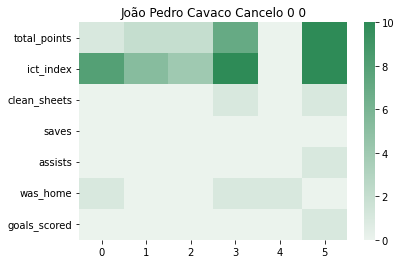

Player in Marcos Alonso. 4.222835298237031 To double trade  = False 


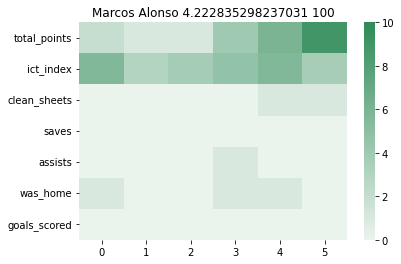

successful transfer Yves Bissouma Gabriel Teodoro Martinelli Silva
Player out Yves Bissouma. 0 To double trade  = False 


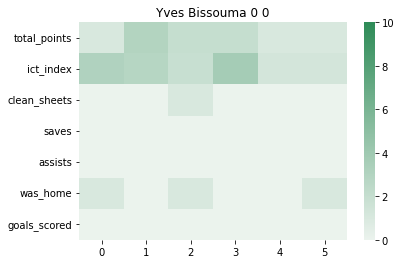

Player in Gabriel Teodoro Martinelli Silva. 5.250146182328123 To double trade  = False 


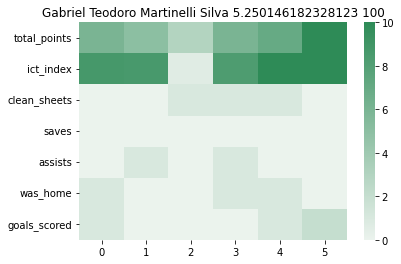

In [3]:
current_squad, non_squad = await get_current_squad(features, window=agent.window, num_players=agent.num_players)
current_squad, non_squad = await agent.get_new_squad(features)
squad = current_squad + non_squad

In [4]:

#agent.get_wildcard_squad(squad, max_weight=1000, visualize=False)

## Show game week id

In [5]:
agent.gameweek

<coroutine object get_latest_game_week at 0x7fe5fa69db40>

## Use model to swap players

## Set playing 11

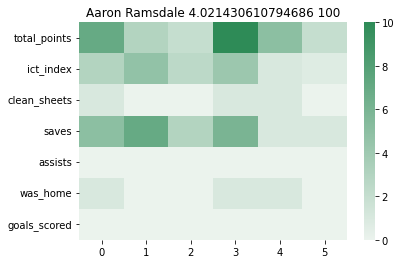

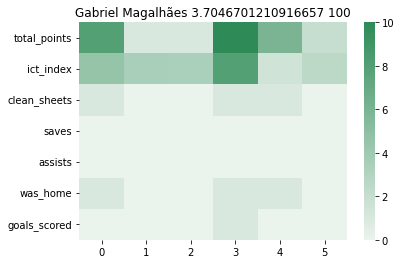

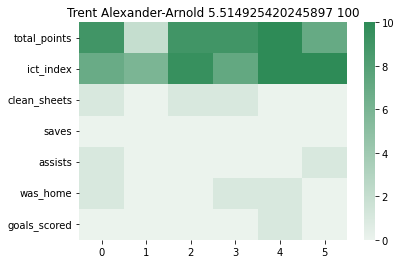

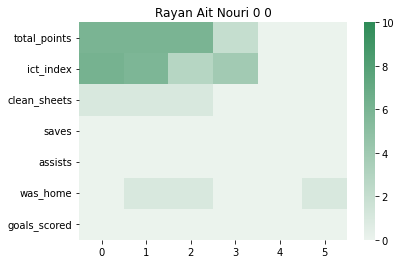

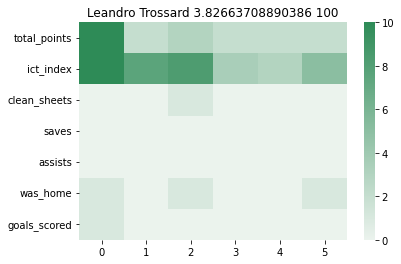

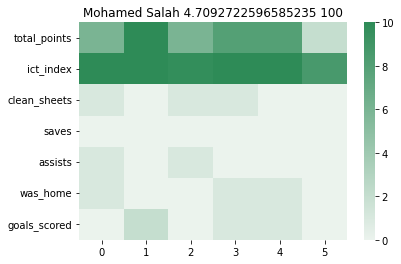

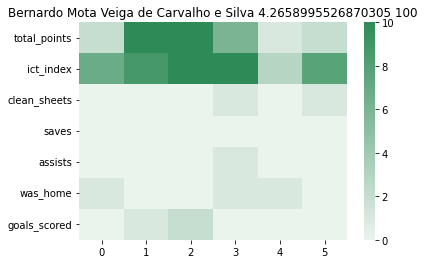

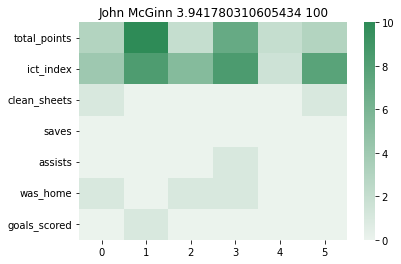

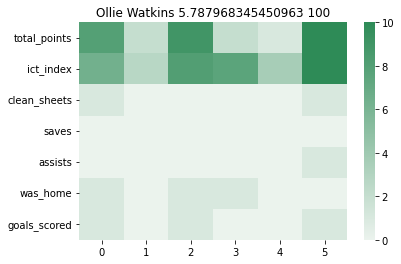

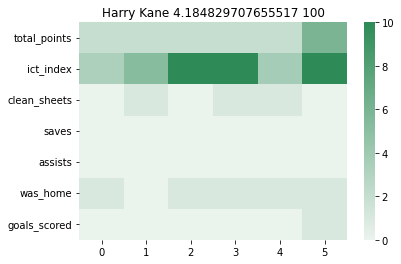

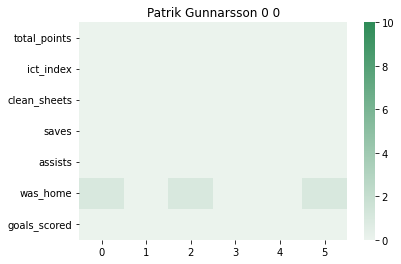

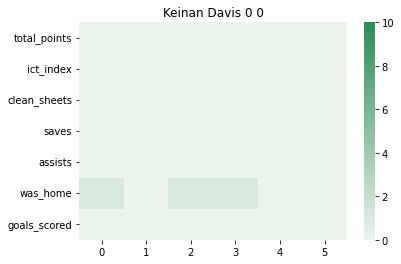

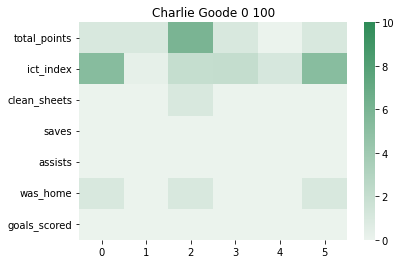

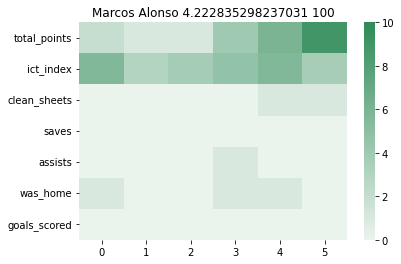

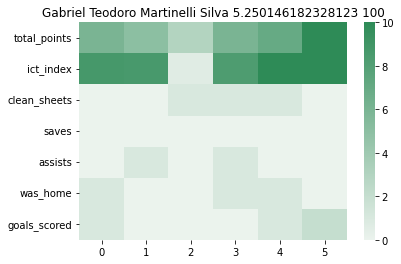

In [6]:
await agent.set_playing_11(current_squad, visualize=True)


## Highlight top performers by position for this week





Goalkeeper
Lukasz Fabianski


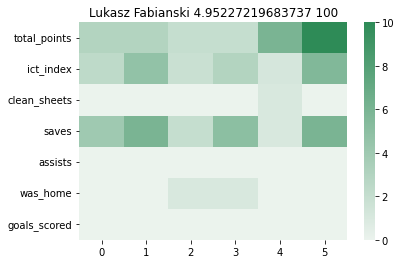

David de Gea


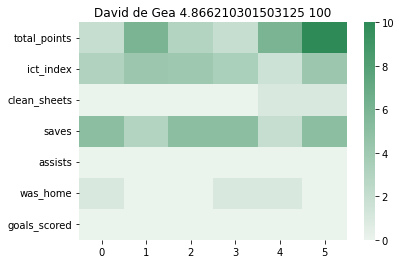

Jordan Pickford


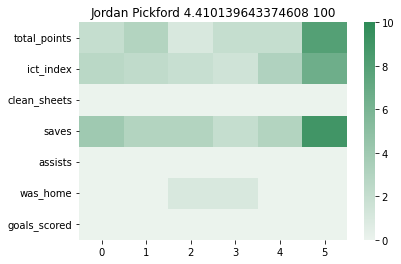

Nick Pope


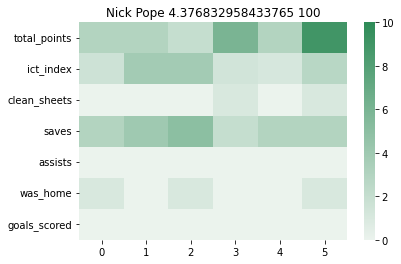

Emiliano Martínez


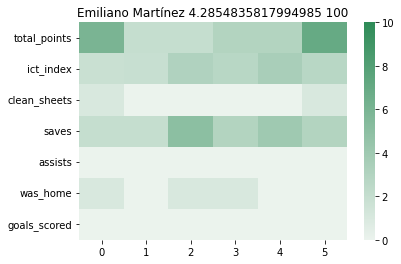










Defender
Trent Alexander-Arnold


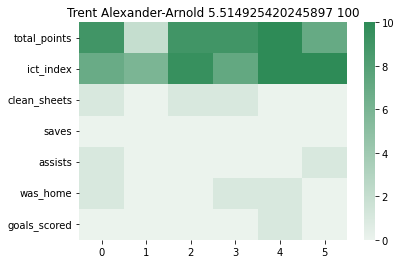

Andrew Robertson


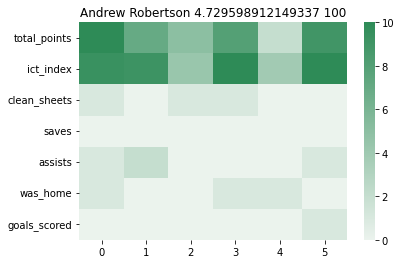

Marcos Alonso


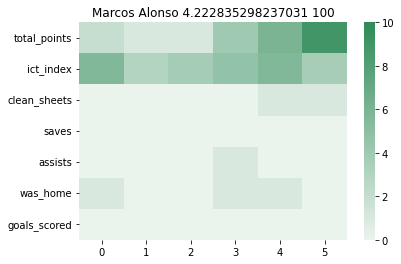

Rúben Santos Gato Alves Dias


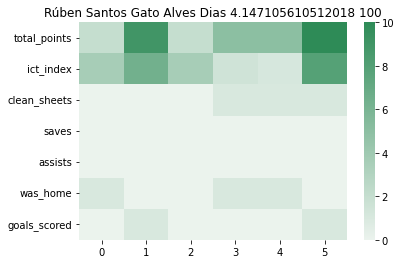

Takehiro Tomiyasu


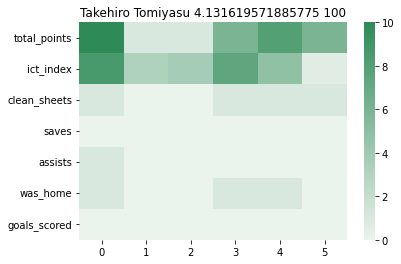










Midfielder
Gabriel Teodoro Martinelli Silva


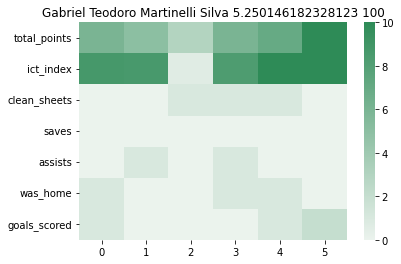

Mason Mount


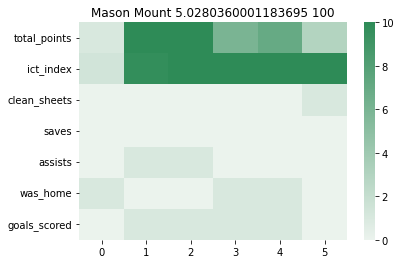

Martin Ødegaard


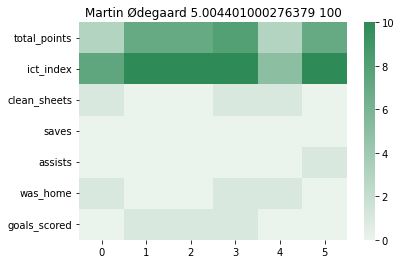

Bukayo Saka


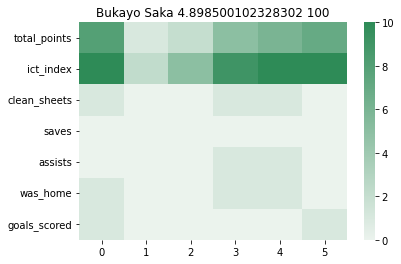

Mohamed Salah


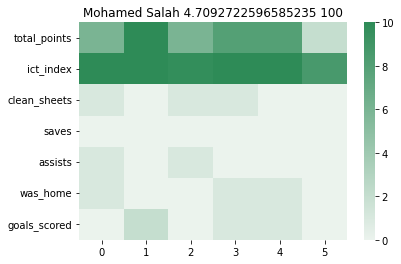










Forward
Ollie Watkins


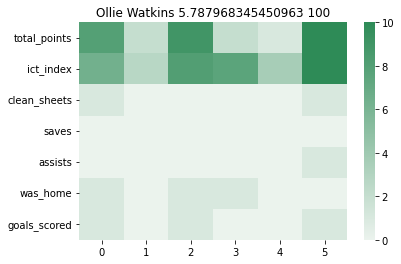

Cristiano Ronaldo dos Santos Aveiro


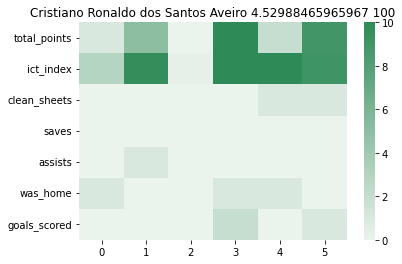

Emmanuel Dennis


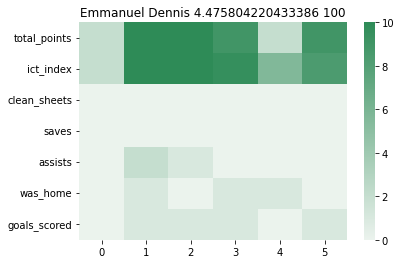

Harry Kane


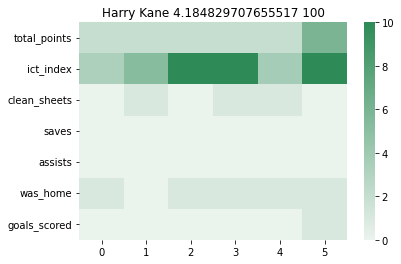

Alexandre Lacazette


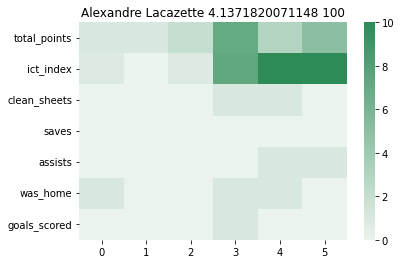

In [7]:
agent.show_top_performers(current_squad + non_squad, k=5)